In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain
import warnings
import uuid
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

dir = '/media/data1/ravram/DeepECG/ekg_waveforms_output/df_xml_2023_05_09_2004-to-june-2022_n_1572280_with_labelbox_no_duplicates.parquet'
data_ = pd.read_parquet(dir)
data_['RestingECG_PatientDemographics_PatientID'] = [str(i).zfill(7) for i in data_['RestingECG_PatientDemographics_PatientID'].tolist()]
data = data_.sort_values(by=['RestingECG_PatientDemographics_PatientID'])

In [3]:
for i in data['diagnosis']:
    if 'Fibrillation ventriculaire' in i :
        print(i)
        break

Fibrillation ventriculaire ECG anormal


In [4]:
data['diagnosis'][50]

'Bradycardie sinusale ECG normal par ailleurs'

In [5]:
dict_equivalence_0 = {

    'Rapport R/S augmenté en V1, considérer rotation horaire ou infarctus postérieur':                 ['Rapport R/S augmenté en V1, considérer rotation horaire ou infarctus postérieur','Rapport R/S augmenté en V1, considérer rotation horaire ou infarctus postérieur','Rapport RS augmenté en V1 considérer','Rapport RS augmenté en V1 a considérer','Rapport RS augmenté en V1 à considérer'],
    'Tracé de Brugada, type 2':               ["Pattern Brugada type 2 (non diagnostic)",'pattern brugada type 2'],   
    'Tracé de Brugada, type 1':               ["ECG avec 15 dérivations modifiées (Brugada). Présence d'un pattern type I, diagnostic de syndrome de Brugada.",'BRUGADA','brugada','Tracé de Brugada, type 1','brugada de type 1 ou 2',],

    # Axe (Concepts)
    'Axe gauche':                             ['Déviation axiale gauche','Deviation axiale gauche','Axe gauche','deviation axiale gauche','rotation horaire','axe gauche'],
    'Axe indéterminé':                        ['Axe indéterminé'],
    "Axe droit":                              ['Axe droit','Déviation axiale droite','Déviation axiale supérieure droite','Deviation axiale droite','axe droit'],
    'Axe nord-ouest':                         ['Axe nord-ouest','axe extrême'],
    'Axe P anormal, rythme auriculaire ectopique possible':                            ['Axe P anormal, rythme auriculaire ectopique possible'],
    'Axe P anormal':                          ['Axe P anormal','Axe P anormal'],

    'à éliminer':                             ['à éliminer','a éliminer'],
    'onde P intrinsèques':                    ['onde P intrinsèques','Onde P intrinseque'],
    'rythme auriculaire ectopique':           ['rythme auriculaire ectopique'],
    'Rythme sinusal':                         ['Rythme sinusal','Rythme probablement sinusal','Rithme sinusal','rythme sinusal','Rythme sinuslal','Rythme sinuslal',"RYTHME SINUSAL",'rythme sinusal','rythm auriculair','rythm auriculaire','rythme auriculaire','Ryhtme sinusal  64/ minute'],
    #Arythmie (Diagnosis)
    'Fibrillo-flutter auriculaire':           ['Fibrillo-flutter auriculaire'],
    'Arythmie sinusale':                      ['arythmie sinusale','arythmie sinusale marquée','Arythmie sinusale','aryuthmie sinusale'],
    'Arythmie supraventriculaire':            ['Arythmie supraventriculaire','arythmie supraventriculaire'],
    'Fibrillo':                               ['Fibrillo'],
    'Fibrillation auriculaire avec conduction aberrante': ['Fibrillation auriculaire avec conduction aberrant','fibrillation auriculaire avec conduction aberrant'],
    'Fibrillation auriculaire avec réponse ventriculaire lente': ['Fibrillation auriculaire avec réponse ventriculaire lente','fibrillation auriculaire avec réponse ventriculaire lente'],
    'Fibrillation auriculaire avec réponse ventriculaire rapide': ['Fibrillation auriculaire avec réponse ventriculaire rapide','fibrillation auriculaire avec réponse ventriculaire rapide'],

    'Fibrillation auriculaire':               ['fibrillation auricualire','Fibrillation auriculaire','fibrillation auriculaire','Fibrillaton auriculaire','Fibrillation auricualire','Fibrillation atrial',' FA ',' Fa ','Fibril;lation auriculaire', ' fa '],
    'Fibrillation ventriculaire':             ['fibrillation ventriculaire','Fibrillation ventriculaire'],
    'Flutter auriculaire':                    ['FLUTTER AURICULAIRE','Flutter auricularire','Fl;utter auricualire','Flutter auriculaire','flutter auriculaire','Flutter auricy ulaire', 'flutter atrial','FVlutter auriculaire'],
    'Flutter ventriculaire':                  ['Flutter ventriculaire','flutter ventriculaire'],
    "Flutter":                                ['flutter','Flutter','Fultter'],
    'Bradycardie sinusale':                   ['Bradycardie sinusale','Bradycardie sinusale marquée','Bradycardie sinusale marquée'],
    'Rythme jonctionnel':                     ['Rythme jonctionnel','rythme jonctionnel probable','rythme jonctionnel','ryythme jonctionnel'], #ajouter a PR court et P anorma;
    'Tachycardie sinusale':                   ['Tachycardie sinusale','132 batt/min'],
    'Tachycardie supraventriculaire':         ['Tachycardie supraventriculaire','tachycardie supreventriculaire','salves tsv','TSV','tsv'],
    'Tachycardie à QRS fins':                 ['Tachycardie à QRS fins','Tachycardie régulière à QRS fins','tachycardie à QRS fins','Tachycardie à QRS fin','tachycardie régulière à QRS fins'],
    'Pacing auriculaire':                     ['pacing auriculaire','Pacing auriculaire','Pacing auriculaire'],
    'Pacing ventriculaire':                   ['pacing ventriculaire','Pacing ventriculaire','Pacing ventricualire'],
    "pacing dans l'onde T":                   ["pacing dasn l'onde T"],
    'Bradycardie auriculaire inférieure droite':                  ['Bradycardie auriculaire inférieure droite'],
    'Bradycardie auriculaire inférieure gauche':                  ['Bradycardie auriculaire inférieure gauche'],
    'bradycardie jonctionnelle':              ['bradycardie jonctionnelle probable','bradycardie jonctionnelle'],
    'Réponse ventriculaire lente':            ['Réponse ventriculaire lente','réponse ventriculaire lente','Reponse ventriculaire lente','reponse ventriculaire lente'],
    'Bradycardie auriculaire gauche':         ['Bradycardie auriculaire gauche'],
    'Bradycardie auriculaire droite':         ['Bradycardie auriculaire droite'],

    'Rythme idioventriculaire':               ['Rythme idioventriculaire'],
    'Aspect de lésion latérale':              ['Aspect de lésion latérale'],
    'Bradycardie auriculaire ectopique possible':                           ['bradycardie auriculaire ectopique possible'],
    'Tachycardie auriculaire ectopique possible':['tachycardie auriculaire ectopique possible','tachycardie auriculaire'],
    "Tachycardie jonctionnelle":              ["tachycardie jonctionnelle probable",'tachycardie jonctionnelle'],
    'Tachycardie auriculaire paroxystique':   ['Tachycardie auriculaire paroxystique','tachycardie auriculaire paroxystique', 'TAP', 'tap'],
    'bradycardie auriculaire ectopique':      ['bradycardie auriculaire ectopique'],     


    #Arythmie (Concepts)
    'Rythme de nature indéterminée':          ['Rythme de nature indéterminée'],                 # <- same ?
    'Rythme irrégulier de nature indéterminée':                        ['rythme irrégulier de nature indéterminée'], # <- same ?

    'Dissociation A-V':                       ['dissociation A-V', 'dissociation a-v','dissociation AV','dissociation av','Dissociation A-V', 'Dissociation a-v','Dissociation AV','Dissociation av'],                        
    'Conduction AV prolongée':                ['conduction AV prolongée','conduction A-V prolongée','conduction av prolongée','conduction a-v prolongée'],
    'Rythme à QRS large':                     ['QRS très large','Rythme à QRS large','élargissement du QRS','élargissement du QRS et anomalie de la repolarisation','élargissement du QRS'],
    'Tachycardie à QRS large':                ['Tachycardie à QRS large'],
    'Pré-excitation ventriculaire, WPW de type B':                      ['Pré-excitation ventriculaire, WPW de type B',],
    'Pré-excitation ventriculaire, WPW de type A':                      ['Pré-excitation ventriculaire, WPW de type A'],
    'Pause sinusale':                         ['pause sinusale'],
    'Échappement ventriculaire':              ['échappement ventriculaire'],
    'Réponse ventriculaire rapide':           ['réponse ventriculaire rapide'],
    'Réponse ventriculaire lente':            ["réponse ventriculaire lente"],
    "Anomalie de la repolarisation":          ['anomalie de la repolarisation','anomalie de la repolarisation','élargissement du QRS et anomalie de la repolarisation','Anomalie non-spécifique de la repolarisation'],
    'Échappement jonctionnel':                ['échappement jonctionnel'],
    'Conduction rétrograde':                  ['conduction rétrograde'],
    'Foyer jonctionnel en compétition':       ['foyer jonctionnel en compétition'],
    "Forme bigiminé":                         ['de forme bigiminée'],
    "Complexe(s) de fusion":                  ['Complexe(s) de fusion','extrasystoles ventriculaires et complexes de fusion'],
    "Complexes sinusaux":                     ['complexes sinusaux'],

    'Rythme ventriculaire entrainé':          ['Rythme ventriculaire entrainé','Rythme ventriculaire entrainé, onde P intrinsèques','complexes à rythme ventriculaire entrainé'],
    'Rythme auriculaire entrainé':            ['Rythme auriculaire entrainé', 'complexes à rythme auriculaire entrainé','complexes à rythme auriculaire entrainé'],

    'Rythme AV entrainé sequentiel':          ['Rythme AV entrainé sequentiel','complexes AV à rythme entrainé sequentiel'],
    'Rythme auriculaire gauche':              ['Rythme auriculaire gauche'],
    'Rythme auriculaire inférieur droit':     ['Rythme auriculaire inférieur droit'],
    "Rythme sinusal":                         ['Rythme de sinus','Rythme sinusal normal','Rythme sinusal'],

    #Infarctus (Diagnosis)
    'Infarctus inférieur':                    ['IDM INFERIEUR','In farctus inférioeur','iinfarctus inférier','IM inférieur','Infactus inférieur','infarctus inferieur','Infarctus inférieur',"Envisager l'implication du ventricule droit, infarctus inférieur aigu",'Infarctus inférieur','ischemie inferieure','infarctus inférieur','infarctus inférieur','ischemie inferieure','infarctus inférieur','Infarctus inferieur','Infarctus du myocarde inférieur','infarctus inférieur','infarctus inférieur','Infarctus du myocarde inférieur'],
    'Infarctus antérieur':                    ['infarctus anterieur','Infarctus antérieur','Infarctus antérieure','Infarctus antérirur','infarctus antérieur','Infarctus anterieur','Wide Anterior Myocardial Infarction','Aspect de lésion antérieure','Infarctus antérieure'],
    'Infarctus inféropostérieur':             ['Infarctus inféropostérieur','Infarctus inféro-postérieur','infarctus inféropostérieur','infarctus inféro-postérieur'],
    'Infarctus antérolatéral':                ['Infarctus antérolatéral','infarctus antérolatéral','infarctus anterolateral','Infarctus inferolateral aigu','infarctus inférolatéral'],
    'Infarctus antéroseptal':                 ['infarctus antéroseptal','Infarctus antéroseptal','infarctus antéro-septal x indéterminé','infarctus anteroseptal','infarctus antéro-septal','Infarctus anteroseptal'],
    'Infarctus septal':                       ['Infarctus septal','infarctus septal'],
    'Infarctus latéral':                      ['Infarctus latéral','infarctus latéral'],
    'Infarctus postérieur':                   ['Infarctus postérieur','infarctus postérieur','Infarctus posterieur'],
    'Infarctus inféro-latéral':               ['Infarctus inféro-latéral'],

    'Ischémie inférieur':                    ['Ischemie inférieur','ischemie inferieur'],
    'Ischémie antérieur':                    ['ischemie anterieur','Ischemie antérieur','Ischemie antérieure','Ischemie antérirur','ischemie antérieur','Ischemie anterieur','Wide Anterior Myocardial Ischemia','Aspect de lésion antérieure','Ischemie antérieure'],
    'Ischémie inféropostérieur':             ['Ischemie inféropostérieur','Ischemie inféro-postérieur'],
    'Ischémie antérolatéral':                ['Ischemie antérolatéral','ischemie antérolatéral','ischemie anterolateral','Ischemie inferolateral aigu','ischemie inférolatéral'],
    'Ischémie antéroseptal':                 ['ischemie antéroseptal','Ischemie antéroseptal','ischemie antéro-septal x indéterminé','ischemie anteroseptal','ischemie antéro-septal','Ischemie anteroseptal'],
    'Ischémie septal':                       ['Ischemie septal','ischemie septal'],
    'Ischémie latéral':                      ['Ischemie latéral','ischemie latéral'],
    'Ischémie postérieur':                   ['Ischemie postérieur','ischemie postérieur','Ischemie posterieur'],
    'Ischémie inféro-latéral':               ['Ischemie inféro-latéral','Ischemie inférolatéral','ischemie inféro-latéral','ischemie inférolatéral'],

    #Autre (Concept)
    'Bas voltage des QRS':                    ['Bas voltage des QRS','Bas voltage dans les dérivations frontales','Bas Voltage','undersensing?','Bas voltage'],
    "QRS fin":                                ['QRS fin'],
    "QRS large":                              ['QRS large'],
    "Trouble de conduction intraventriculaire non-spécifique":   ['Trouble de conduction intraventriculaire non-spécifique','Trble de conduction intraventriculaire'],
    'Trouble de conduction':                 ['Tropuble de conduction'],

    'QT allongé':                             ['QT allongé'],
    'Repolarisation précoce':                 ['Repolarisation précoce'],

    #Autre (Diagnosis)
    'Dilatation auriculaire droite':          ['Dilatation auriculaire droite','dilatation auriculaire droite',"dilatation de l'oreillette droite"],
    'Dilatation auriculaire gauche':          ['Dilatation auriculaire gauche','dilatation auriculaire gauche','oreillette gauche dilatéé',"dilatation de l'oreillette gauche"],
    'Dilatation bi-auriculaire':              ['Dilatation bi-auriculaire','Dilatation bi- auriculaire','dilatation bi-auriculaire'],

    #Pacemaker (Diagnosis)
    'Cardio-stimulateur ventriculaire':       ['Cardio-stimulateur ventriculaire','cardiostimulateur ventriculaire','electrostimulation ventriculaire','Electrostimulation ventriculaire','paceaker ventricul;aire','paceaker ventricul;aire'],
    'Cardio-stimulateur à demande':           ['Cardiostimulateur a la demande','Cardio-stimulateur à demande; interprétation basée sur le rythme spontané','Cardio-stimulateur à demande','cardio-stimulateur à demande'],
    'Cardio-stimulateur auriculaire':         ['Cardio-stimulateur auriculaire','Cardiostimulateur auriculaire'],
    'Cardio-stimulateur séquentiel (double chambre)':                    ['Cardio-stimulateur séquentiel (double chambre)','Cardiostimulateur sequentiel'],
    'Cardio-stimulateur séquentiel':          ['Cardio-stimulateur séquentiel'],

    'Stimulateur cardiaque biventriculaire détecté':             ['Stimulateur cardiaque biventriculaire détecté'],
    'Pacemaker auriculaire':                                     ['Pacemaker auriculaire'],
    'Pacemaker sentinelle':                                      ['pacemaker sentinelle'],
    'Pacemaker ventriculaire':                     ['battements de pacemaker ventriculaire','paceaker ventricul;aire','Pacemaker Ventriculaire','paceaker ventricul;aire'],
    
    'onde U':                                 ['oonde U proéminente','onde U','onde u'],

    #Anomalie de l'onde T (Concept)
    'Anomalies ST-T antérolatérales': ['Anomalies ST-T antérolatérales','Anomalies ST-T antéro-latérales'],
    'Anomalies non-spécifiques des segments ST-T': ['Anomalie non-spécifique du ST-T','Anomalies ST_T non-spécifiques','Anomalies ST-T non-spécifique','anomalies ST-T non-spécifiques','Anomalie non-spécifique ST-T','Anomalies non-spécifiques des segs ST-T','Anomalies non-spécifiques des segs STT','anomalies stt','Anomalies nonspécifiques des segs STT','Anomalie nonspécifique STT','Anomalie non-spécifique ST-T','Anomalie non-spécifique du ST-T'],
    "Anomalie de l'onde T; ischémie inférieure possible":                ["Anomalie de l'onde T; ischémie inférieure possible","Anomalie marquée de l'onde T; ischémie inférieure possible"],
    "Anomalie de l'onde T; ischémie latérale possible":                  ["Anomalie de l'onde T; ischémie latérale possible","Anomalie marquée de l'onde T; ischémie latérale possible"],
    "Anomalie de l'onde T; ischémie antérieure possible":                ["Anomalie de l'onde T; ischémie antérieure possible","Anomalie marquée de l'onde T; ischémie antérieure possible"],
    "Anomalie de l'onde T; ischémie inférolatérale possible":            ["Anomalie de l'onde T; ischémie inférolatérale possible","Anomalie marquée de l'onde T; ischémie inférolatérale possible","Anomalie de l'onde T; ischémie antérolatérale possible"],
    "Anomlies de l'onde T; non-spécifique en antéroseptal":              ["Anoamlies de l'onde T non-spécifique en antéroseptal"],      


    #Anomalie  de l'onde T Autre (Concept)
    "Anomalie non-spécifique de l'onde T":    ["Anomalie non-spécifique de l'onde T","Anomalie nonspécifique de l'Onde T","anomalies de l'onde t","Anomalies de l'onde T non-spécifique","Anomalie non-spécifiques de l'onde T","anomalie non-spécifiques de l'onde T"],
    'Anomalie du segment ST':                 ['anomalie du segment st','anomalie du segment ST','Anomalie du segment ST','ANOMALIES DU ST','anomalie du seg ST','Anomalie non spécifique du seg ST','non spécifique du seg ST','anomalie du st','Anomalie non spécifique du seg ST','anomalies du st','anomalie du seg ST',"anomalies non specifiques du seg ST","Anomalies non specifiques du seg ST","Anomalies ST-T non-spécifiques", "Anomalie de ST et",'anomalie du segment ST et','Anomalie non-spécifique du ST-T','Anomalie non-spécifique du segment ST','Anomalie du ST; imprégnation digitalique possible',"Anomalie marquée du ST; lésion sous-endocardique inférieure possible"],
   
    
    'Anomalie marquée du ST; lésion sous-endocardique septale possible':         ['Anomalie importante du ST; lésion sous-endocardique septale possible','Anomalie marquée du ST; lésion sous-endocardique septale possible'],
    'Anomalie marquée du ST; lésion sous-endocardique antérieure possible':      ['Anomalie marquée du ST; lésion sous-endocardique antérieure possible'],
    'Anomalie marquée du ST; lésion sous-endocardique inférolatérale possible':  ['Anomalie marquée du ST; lésion sous-endocardique inférolatérale possible','Aspect de lésion inférolatérale','Sus-décalage du ST; possibilité de lésion inférolatérale ou infarctus aigu'],
    'Anomalie marquée du ST; lésion sous-endocardique latérale possible':        ['Anomalie marquée du ST; lésion sous-endocardique latérale possible'],
    'Anomalie marquée du ST; lésion sous-endocardique antéroseptale possible':   ['Anomalie marquée du ST; lésion sous-endocardique antéroseptale possible','Sus-décalage du segment ST dans les dérivations antéroseptales - repolarisation précoce possible','Sus-dÃ©calage du segment ST dans les dÃ©rivations antÃ©roseptales - repolarisation prÃ'],


    #Sus-decalage du ST (Concept)
    'Sus-décalage du ST, possibilité de repolarisation précoce':                       ['Sus-décalage du ST, possibilité de repolarisation précoce','Susdécalage du seg ST','Susdécalage du seg ST'],
    'Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu':      ['Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu'],
    'Sus-décalage du ST; possibilité de lésion inférieure ou infarctus aigu':          ['Sus-décalage du ST; possibilité de lésion inférieure ou infarctus aigu','Aspect de lésion inférieure','Ss-décalage du ST; possibilité de lésion ss-endocardique','Ss-décalage du ST; possibilité de lésion ss-endocardique','Ss-décalage du ST; possibilité de lésion ss-endocardique '],
    'Sus-décalage du ST; possibilité de repolarisation précoce, péricardite ou lésion':['Sus-décalage du ST; possibilité de repolarisation précoce, péricardite ou lésion','Sus-décalage du ST, possibilité de repolarisation précoce'],
    'Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu':      ['Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu'],
    'Sus-décalage du ST; possibilité le lésion antérieure ou infarctus aigu':          ['Sus-décalage du ST; possibilité le lésion antérieure ou infarctus aigu','Sus-décalage de ST en anterieur compatiblelésion ss-épicardique'],
    'Sus-décalage du ST; possibilité de lésion latérale ou infarctus aigu':            ['Sus-décalage du ST; possibilité de lésion latérale ou infarctus aigu'],

    'Sus-dédalage du ST en dérivations antérolatérales':                     ['Sus-dédalage du ST en dérivations antérolatérales'],
    'Sus-dédalage du ST en dérivations inférieures':                         ['Sus-dédalage du ST en dérivations inférieures'],
    'Sus-dédalage du ST en dérivations latérales':                           ['Sus-dédalage du ST en dérivations latérales'],
    'Sus-dédalage du ST en dérivations antérolatérales':                     ['Sus-dédalage du ST en dérivations antérolatérales'],
    'Sus-dédalage du ST en dérivations inférolatérales':                     ['Sus-dédalage du ST en dérivations inférolatérales'],
    'Sus-dédalage du ST en dérivations latérales':                           ['Sus-dédalage du ST en dérivations latérales'],
    'Sus-dédalage du ST en dérivations antérieures':                         ['Sus-dédalage du ST en dérivations antérieures','Sus-dédalage du ST en antérieur(e)'],
    
    'Sous-décalage du segment ST(V3,V4,V5)':                              ['Sous-dÃ©calage du segment ST(V3,V4,V5)'],
    'Sous-décalage ascendant du ST, probablement normal':                 ['Sous-décalage ascendant du ST, probablement normal'],
    'Sous-décalage ascendant du ST, probablement anormal':                ['Sous-décalage ascendant du ST, probablement anormal','Abaissement non-spécifique du ST'],
    'Sous-décalage du ST; possibilité de lésion sous-endocardique':       ['Sous-décalage du ST; possibilité de lésion sous-endocardique'],

    'Léger sus-décalage de ST':               ["Léger sus-décalage de ST",'Léger sus-décalage de ST: répolarisation précoce'],
    'Ischémie aiguë ou d’hyperkaliémie':      ['Grandes ondes T - aspect dâ??ischÃ©mie aiguÃ« ou dâ??hyperkaliÃ©mi','Grandes ondes T - aspect d’ischémie aiguë ou d’hyperkaliémie'],

    "Anomalie non-spécifiques de l'onde T":           ["Anomalies non-spécifiques de l'onde T"],
    "Anomalie marquée de l'onde T; ischémie antérolatérale possible":          ['Aspect de lésion antérolatérale',"Anomalie marquée de l'onde T; ischémie antérolatérale possible",'Anomalie marquéedu ST; lésion sous-endocardique antérolatérale possible'],


    #Inversion de l'onde T (Concept)
    "Inversion de l'onde T en dérivations inférieures":                        ["Inversion de l'onde T en dérivations inférieures"],
    "Inversion de l'onde T en dérivations latérales":                           ["Inversion de l'onde T en dérivations latérales"],
    "Inversion de l'onde T en dérivations inférieures":                         ["Inversion de l'onde T en dérivations inférieures"],
    "Inversion de l'onde T en dérivations inférolatérales":                     ["Inversion de l'onde T en dérivations inférolatérales"],
    'T négatif(V1,V2,V3,V4,V5,V6)':           ['T négatif(V1,V2,V3,V4,V5,V6)'],
    'T négatif(V3,V5)':                       ['T nÃ©gatif(V3,V5)','T négatif(V3,V5)'],
    'T négatif(V1,V2)':                       ['T négatif(V1,V2)','T nÃ©gatif(V1,V2)'],

    'Anomalie diffuse du segment ST-T,aspect de lésion/ischémie myocardique':                    ['Anomalie diffuse du segment ST-T, aspect de lÃ©sion/ischÃ©mie myocardique','Anomalie diffuse du segment ST-T aspect de lésion/ischémie myocardique'],

    #Bloc (Diagnosis)
    'Bloc A-V du premier degré':              ['bav 1er degré','bloc AV haut degré','bloc AV 1er degré','bloc av 1 degre','bloc AV de 1er degré','Bloc Av premier degrée','bloc AV du 1 degre','bloc AV du 1e degré','Bloc AV du premier degré','bloc Av du premier degré','bloc Av du premier degré','bolc av 1e degre','bloc AV 1er degré','bloc AV du premier degré','BAV 1er degré','Bloc AV du 1er degré','bloc AV du 1er degré','bloc A-V du premier degré','Bloc AV 1er degré','bloc AV du premeier degré','bav 1er degré','bloc AV de 1er degré','Bloc A-V du premier degré','bloc AV premier degré','bloc AV 1er','bloc av premier degré','BAV'],
    'Bloc AV 2ème degré (type 1)':            ['Bloc AV deuxième degré type I','bloc AV du deuxième degré type 1','bloc AV 2ème degré (type 1)','Bloc AV 2ieme degré type Wenckback','Wenckebach','BAV Wenckebach','bloc Mobitz I (Wenkebach)','wenckebach'],
    'Bloc de branche droit incomplet':        ['Bloc de branche droit incomplet','bloc de branche droit incomplet'],
    'Bloc de branche droit complet':          ['Bloc de branche droit complet','BBD complet','bbd complet','bloc de branche droit complet'],
    'Bloc de branche droit':                  ['Bloc de brache droit ','BB droit','bbd','BBD','bloc de branche droit','Bloc de branche droit','Bloc de branche droit'],

    'Bloc de branche gauche incomplet':       ['Bloc de branche gauche incomplet','bloc de branche gauche incomplet'],
    'Bloc de branche gauche complet':         ['Bloc de branche gauche complet','Bloc de branche gauche complet','BBG complet', 'bbg complet'],
    'Bloc de branche gauche':                 ['bloc de branche gauche','BBG','Bloc de branche gauche','bloc de btranche gauche','Trble de conduction intraventriculaire de type bloc de branche gauche'],
    'Bloc A-V complet':                       ['Block AV complet','bloc de haut degre','Blo AV complet','bloc AV complet','bloc A-V complet','bloc AV de haut degré','Bloc AV de haut degré'],

    'Bloc A-V variable':                      ['bloc A-V variable','bloc variable','bloc AV variable','Bloc AV variable','Bloc A-V variable'],
    'bloc av congénital':                     ['bloc av congénital'],
    'Bloc A-V 4:1':                           ['bloc A-V 4:1','bloc 41'],
    "Bloc A-V 2:1":                           ['bloc A-V 2:1','bloc 2:1','bloc 2;1','BAV 2:1','bloc AV 2:1','bloc 21','bloc 21'],
    'Bloc A-V 3:1':                           ['bloc A-V 3:1','bloc 3:1','bloc Av 3:1','bloc 31'],
    'Bloc A-V 5:1':                           ['bloc A-V 5:1','bloc 5:1','bloc 51'],
    'bloc trifasciculaire':                   ['bloc trifasciculaire'],

    'Hémibloc antérieur gauche':              ['HBAG','Hémi-bloc antérieur gauche','hémi-bloc antérieur gauche','Hemi-bloc antérieur gauche','hemi-bloc antérieur gauche','hemibloc anterieur gauche','Hémobloc antérieur gauche R>S en V1','hémibloc antérieur gauche','Hémibloc antérieur gauche','Hémibloc antérieur gauche','Hemibloc anrerieur gauche','Hemi-bloc anterieur gauche','Hemibloc anterieur gauche','Hemibloc anterieur gauche','-hemibloc anterieur gauche'],
    'Hémibloc postérieur gauche':             ['Hémi-bloc postérieur gauche','hémi-bloc postérieur gauche','Hemi-bloc postérieur gauche','hemi-bloc postérieur gauche','hemibloc postérieur gauche','Hémobloc postérieur gauche R>S en V1','hémibloc postérieur gauche','Hémibloc postérieur gauche','Hémibloc postérieur gauche','Hemibloc postérieur gauche','Hemi-bloc postérieur gauche','Hemibloc postérieur gauche','Hemibloc postérieur gauche','-hemibloc postérieur gauche'],
    "Bloc intraventriculaire non-spécifique": ['Bloc intraventriculaire non-spécifique'],
    'Bloc S-A du deuxième degré (Mobitz I)':       ['bloc S-A du deuxième degré (Mobitz I)','Mobitz 1','mobitz i','mobitz 1'],
    "Bloc S-A du deuxième degré (Mobitz II)": ["bloc S-A du deuxième degré (Mobitz II)",'Mobitz 2','mobitz ii','mobitz 2'],
    
    'Bloc A-V du deuxième degré (Mobitz I)':  ['Bloc A-V du deuxième degré (Mobitz I)','bloc A-V du deuxième degré (Mobitz I)','bloc A-V du deuxième degré (Mobitz II)','avec bloc A-V du deuxième degré'],

    'Bloc bifasiculaire':                     ['*** Bloc bifasiculaire ***'],

    #Extrasystoles
    'Extrasystole ventriculaire avec conduction aberrante': ['extrasystoles avec conduction aberrante','Extrasystoles avec conduction aberrante','extrasystole avec conduction aberrante','Extrasystole avec conduction aberrante','extrasystoles avec conductions aberrante','Extrasystoles avec conductions aberrante','extrasystole avec conductions aberrante','Extrasystole avec conductions aberrante'],
    'Extrasystole ventriculaire':             ['ESV','esv','ESVs','Extrasysoles ventriculaires','Extrasystole ventriculaire','extrasystole(s) ventriculaire(s)','extrasystoles ventriculaires','extrasystoles ventriculaires','extrasystoles ventriculaires','extrasystole ventriculaire','extrasystoles ventriculaires'],
    
    "Extrasystole auriculaire":               ['ESA','extra-systoles auriculaires','extrasystole auriculaire','extrasystole(s) auriculaire(s)','extrasystoles auriculaires','nombreuses ESAs'],
    'Extrasystole supraventriculaire':  ['extrasystole supras','ESSV','essv','extrasystole supras','extrasystoles suprasws','extrasystoles suprasws','extrasystole(s) supraventriculaire(s)','extrasystoles supraventriculaires'],
    'Extrasystole':                           ['Extrasystoles','extrasystole','extrasysoles s','extrasysoles(s)','exrasystole','extra syatoles','extrasystoles','Extrasystole(s)','Extrasystoles(s) fréquentes','Extrasystoles s fréquentes'],
    

    "RSR' ou QR en V1 suggère un retard de conduction ventriculaire droit":  ["RSR' ou QR en V1 suggère un retard de conduction ventriculaire droit","rsr's' en V1","RSR' en V1"],
    "Retard de conduction intraventriculaire non-spécifique":                     ['Retard de conduction intraventriculaire non-spécifique'],
    "Divergence anormale axes QRS et T; possibilité d'anomalie primaire de l'onde T":                     ["Divergence anormale axes QRS et T; possibilité d'anomalie primaire de l'onde T"],
    'Sous-décalage du ST; possibilité de lésion sous-endocardique ou imprégnation digitalique':        ['anomalie des segs ST imprégnation digitalique','anomalie des segments ST imprégnation digitalique','anomalie des segments ST imprégnation digitalique','Ss-décalage du ST; possibilité de lésion ss-endocardique','Imprégnation digitalique probable','ou imprégnation digitalique','anomalie des segments ST imprégnation digitalique','Sous-décalage du ST; possibilité de lésion sous-endocardique ou imprégnation digitalique','Sous-décalage de ST, envisager une lésion sous-endocardique'],

    # Autre (Concept)
    'Q anormal(V1,V2,V3,V4,V5,V6)':           ['Q anormal(V1,V2,V3,V4,V5,V6)','Onde q anormale(V1,V2,V3,V4,V5,V6)'],
    'Produit Cornell':                        ['Produit Cornell'],
    'Sokolow-Lyon':                           ['Sokolow-Lyon'],
    'Romhilt-Estes':                          ['Romhilt-Estes'],
    'Évoque une maladie pulmonaire':          ['Évoque une maladie pulmonaire'],
    'Wolff-Parkinson-White':                  ['Wolff-Parkinson-White','fusion ou pré-excitation ventriculaire intermittente (WPW)', 'WPW possible','-WPW','WPW','wolff-parkinson-white'],
    'Pouls incertain':                        ['Pouls incertain'],


    'Complexes intrinsèques':                 ['complexes intrinsèques'],
    'Complexes ventriculaires prématurés fréquents':                ['Complexes ventriculaires prÃ©maturÃ©s FrÃ©quent'],
    'Basse tension (fils de coffre)':         ['Basse tension (fils de coffre)'],
    'Capture sinusale/auriculaire':           ['Capture sinusale/auriculaire'],
    'Basse tension':                          ['Basse tension'],
    'conduction aberrante':                   ['Conduction aberrante','conduction aberrante','Conduction aberrant','conduction aberrant'],
    "Voltage de grande amplitude dans les précordiales moyennes":      ['voltage de grande amplitude dans les précordiales moyennes','Diminution des voltages de v1 à V6'],
    "Complexes supraventriculaires":          ['complexes supraventriculaires'],
    "Grandes ondes T":                        ['Grandes ondes T'],      

    # Autre (Diagnosis)
    'Péricardite':                            ["***PÉRICARDITE AIGÜE***",'pericardite aigue','pericardite','péricardite','Péricardite','Pericardite','PERICARDITE'],
    '(occulté par un hémibloc ?)':            ['(occulté par un hémibloc ?)','(occulté par un hémibloc ?)'],


    #Intervale et ondes (Concept)
    
    'Intervalle QT prolongé':                 ['Intervalle QT prolongÃ©','QT long','QTc long', 'qt long','qt long','qt long','QT prolongee (amiodarone)','QT prolongee (amiodarone)','QTc long','allonge du QT','QT long','qt long','allongement du QT'],
    'Onde P prolongée':                       ['Onde P prolongÃ©e'],
    'ondes P':                                ['ondes P'],
    'p bloqués':                              ['p bloqués'],
    'R en aVL':                               ['R en aVL','( R en aVL )','( R en aVL ,'],
    "PR court":                               ['PR court','PR court','Intervalle court de P. R.'],
    'PR long':                                ['PR long','PR de 280ms','PR limite','long PR','PR allongé','PR allongé'],
    'P rétrograde':                           ['P rétrograde'],

    #warnings
    'Inversion probable des électrodes':      ['*Inversion probable des électrodes des membres supérieures; ECG interprété sans en tenir compte*'],

    "*** ANALYSE ECG SPÉCIFIQUE DE L'ÂGE ET DU SEXE ***":               ["*** ANALYSE ECG SPÉCIFIQUE DE L'ÂGE ET DU SEXE ***"],

    "Pas d'ondes P décelables":               ["(pas d'ondes P décelables)"],
    "lente progression de l'onde R en antérieur":["lente progression de l'onde R en antérieur",'Lente progression onde R en antérieur'],

    'Suspecter une insuffisance du stimulateur cardiaque non précisée':                   ['*** Suspecter une insuffisance du stimulateur cardiaque non précisée'],
    
    'conduction intermittente':               ['conduction intermittente'],
    'IM AIGU/ISCHÉMIE':                       ['*** INRCTUS AIGU ***','*** IM AIGU/ISCHÉMIE ***','*** IM AIGU/ISCHÃ?MIE ***','** ** IM AIGU / STEMI ** **','*** INFARCTUS AIGU ***','Infarctus aigue','infarctus aigue','Infarctus aigu','infarctus aigu'],

    'Rythme atrial gauche suspect?':          ['Rythme atrial gauche suspect?'],
    "Mauvaise qualité de l'ECG":              ["*** ATTENTION! mauvaise qualité de l'ECG***"],
    "Demo ECG":                               ['*** DEMO LICENSE - NOT VALID FOR PRODUCTION USE ***'],
    "ANALYSE PÉDIATRIQUE DE L'ECG":           ["***ANALYSE PÉDIATRIQUE DE L'ECG***"],
    'Bas voltage des QRS':                    ['BAS VOLTAGE DES QRS','Bas voltage des QRS','bas voltage des QRS','bas voltage'],

    'VD systémique':                          ['VD systémique'],

    'Analyse impossible; aucun QRS décelable':                       ['*Analyse impossible; aucun QRS décelable*'],
    "Matériel d'acquisition peut-être défectueux":               [ "***ATTENTION! matériel d'acquisition peut-être défectueux***"],
    "Analyse impossible; moins de 4 QRS détectés":                  ['*Analyse impossible; moins de 4 QRS détectés*'],
    'Positionnement dérivations non standard, interprétation ECG non disponible':             ['** Positionnement dérivations non standard, interprétation ECG non disponible **','Inversion electrodes aVR-aVL'],
    'ECG anormal': ['ECG anormal','ecg anormal'],
    'ECG normal':  ['ECG normal','ECG NORMAL','ecg normal','ECG  normal','ECG Normal'],
    'intermittent':['intermittent'],
    'Dextrocardie': ['Onde R proéminente en VI dextrocradie','Onde R proéminente en VI dextrocradie','Régression onde R de V1 à V6 suggérant une dextrocardie','Régression onde R de V1 à V6 suggérant une dextrocardie','Onde R proéminente en VI dextrocradie','Régression onde R de V1 à V6 suggérant une dextrocardie','Dextrocardie connue','dextrocardie','Dextrocardie','DExtrocardie','Dextrocardie connue','dextrocardie','Dextrocardie','DExtrocardie'],
    
    'Rythme électro-entraîné':['Rythme électro-entraîné','complexes s entrainés','complexes s entrainés','complexes(s) entrainés', 'complexes(s) à rhyme entrainé','complexes s entrainés','entraîné','complexes s à rhyme entrainé','battes s electroentraines','Electroentraine','AVEC QUELQUES COMPLEXES ELECTROENTRAINÉS','electroentraîné','Rythme electro-entraîné','complexes entrainées','quelques complexes ventriculaires entrainées','quelques complexes entrainées','Entraîneur électrosystolique','rythme electro entrainé','Rythme  entraîné','Rythme électroentraîné','rythme électroentrainé','complexes s à rhyme entrainé'],
    'Ancien': ['Amncien','ancien','Ancien','ANCIEN'],
    'microvoltage derivations precordiales': ['microvoltage derivations precordiales'],
    'Ischemie inferieure non exclue':['Ischemie inferieure non exclue'],



    "Retard de progression de l'onde R en antéro septal":["Retard de progression de l'onde R en antéro septal"],

    "Régression des voltages de V1 à V6":['Régression des ondes RV1 à V6','Régression des voltages de V1 à V6','Régression des ondes R de Vi à V6','Régression des ondes R de V1 à V6','Diminution onde R de V1 à V6',"Régression de l'onde R de V1 à v6","régression onde R de V1 à V6"],


    "Progression lente de l'onde R de V1 à V3":['Progression lente onde R V13','Mauvaise progression desondes R en',"Mauvaise progression des ondes R en anterieur",'Progression lente onde R V1-V3',"Progression lente de l'onde R de V1-3",'Progression lente onde R en antérieur',"Progression lente de l'onde R de V13",'Progression lente onde R V1V3','lente progression onde R en antérieur',"ABSENCE DE PROGRESSION DE L'ONDE R  v3",'R proéminent en V1'],
    "Progression lente de l'onde R de V1 à V5":["Progression lente de l'onde R de V1 à V5","Lente progression de l'onde R en antéroseptal"],
    "progression lente de l'onde R en V3 à V4":["progression lente de l'onde R en V3V4","progression lente de l'onde R en V3 à V4"],

    "Pauvre progression de l'onde R" :  ["Pauvre progression de l'onde R"],

    'Rythme électro-entraîné':['Rythme électro-entraîné','complexes s entrainés','complexes s entrainés','complexes(s) entrainés', 'complexes(s) à rhyme entrainé','complexes s entrainés','entraîné','complexes s à rhyme entrainé','battes s electroentraines','Electroentraine','AVEC QUELQUES COMPLEXES ELECTROENTRAINÉS','electroentraîné','Rythme electro-entraîné','complexes entrainées','quelques complexes ventriculaires entrainées','quelques complexes entrainées','Entraîneur électrosystolique','rythme electro entrainé','Rythme  entraîné','Rythme électroentraîné','rythme électroentrainé','complexes s à rhyme entrainé'],
    'Ancien': ['Amncien','ancien','Ancien','ANCIEN'],
    'microvoltage derivations precordiales': ['microvoltage derivations precordiales'],
    'Ischemie inferieure non exclue':['Ischemie inferieure non exclue'],



    # garder isolé?
    "Transition précoce":                     ['Transition précoce'],
    "Trouble de conduction intraventriculaire":['Trouble de conduction intra'],
    #Hypertrophie (Dignosis)
    'Hypertrophie ventriculaire gauche':      ['hypertrophie ventriculaire gauche','hypertrophie ventriculairte gauche','Hypertrophie ventriculaire gauche',"Criteres de voltage limites d'HVG ou variante de la normale","Critères de voltage modérés d'HVG ou variante de la normale","Critères de voltage d'HVG",'HVG'],
    'Hypertrophie ventriculaire droite':      ['hypertrophie  droite','hypertrophie  droite','hypertrophie  droite','hypertrophie droite','Hypertrophie ventriculaire droite','avec hypertrophie ventriculaire droite (HVD)','Bloc de branche droit ou hypertrophie ventriculaire droite','hypertrophie ventriculaire droite (HVD)','HVD'],
    'Hypertrophie biventriculaire':           ['Hypertrophie biventriculaire','hypertrophie  gauchedroite'],

    "ischemie anterieure":                    ['ischemie anterieure'],
    'Dissociation isorythmique':              ['Dissociation isorythmique','dissociation isorythmique'],
    'Tachycardie':                            ['Tachycardie','Tachycardie','tachycardie','tachy'],
    'sauf légère augmentation du PR':         ['sauf légère augmentation du PR'],
    'Ondes T pointues':                       ['Ondes T pointues'],
    'Ondes Q en II-III-avF':                  ['Ondes Q en II-III-avF','Ondes Q en DII DIII aVF','Ondes Q en IIIIIavF','Ondes Q en inférieur'],
    'echappes supra hissien':                 ['echappes supra hissien','echappements supra- hissien','echappements supra-hissien'],
    'Progression lente onde R V1-V3':         ['Progression lente onde R V1-V3'],
    'bigéminé':                               ['bigeminisme','bigéminées','bigéminés','bigéminé','Bigéminisme','bigéminées','parfois en bigeminisme','bigiminisme','(bigéminisme)','en bigéminisme','bigémisme','Bigiminisme','en  bigéminisme','bigéminisme'],
    "d'age indéterminé":                      ["d'age indéterminé",'dage indéterminé','date indéterminée'],
     #'ventriculaire':                          ['ventriculaire','ventricuolaire'],
     #'auriculaire':                            ['auriculaire'],
    "Trop d'artefacts":                       ["Trop d'artefacts",'artefacts +++','(artéfacts ++)','artefacts','Tracé de controle suggéré','non clair àcause de bruit dans la ligne de base Un ECG de contole est nécessaire'],
    'sous-jacente':                           ['ss-jacente','ss jacencete','ss jacente','ssjacente','ssjacent'],
    'anévrysme VG':                           ['anévrysme VG'],
    
    'Répolarisation précoce':                ['Répolarisation précoce'],
    'rythme ectopique':                      ['rythme ectopique','rythme ectopique'],

    'Rapport R/S augmenté en V1, considérer rotation horaire': ['Rapport R/S augmenté en V1, considérer rotation horaire','R proéminent en V1'],
    'incomplet':                              ['incomplet'],
    'bloqué':                                 ['bloqué(e)(s)','bloquées'], 
    'ectopique':                              ['ectopique'],
    'sous-jacente':                           ['sous-jacente','sous jacencete','sous-jacent','sous jacente'],
    'erreur v4 v5':                           ['erreur v4 v5'],
    'extension postérieur':                   ['extension postérieur'],
    'conduction 2:1':                         ['conduction 2:1'],
    "peut-être secondaire à l'anomalie du QRS":["peut-être secondaire à l'anomalie du QRS"],
    "pacemaker ventriculaire":                ['pacemaker ventriculaire'],
    "(pas d' décelables)":                    ["(pas d' décelables)"],
                                               
    'antérieure':                             ['antérieure','anterieure'],
    'antérieur':                              ['antérieur','anterieur'],

    'inférieures':                              ['inferieures','inférieures'],
    'inférieure':                               ['inferieure','inférieure'],
    'inférieur':                                ['inferieur','inférieur'],

    'antérolatérale':                         ['antérolatérale'],
    ' latérales':                                [' laterales',' latérales'],
    ' latérale':                                [' laterale',' latérale'],
    ' latéral':                                [' lateral',' latéral'],

    'lésion péricarditique':                  ['lésion péricarditique'],
    'suggestif de':                           ['suggestif de','suggérant une'],
    'compatible':                             ['compatible'],
    'a éliminer':                             ['a eliminer'],
    "d'âge indéterminé":                      ["d'âge indéterminé",'date indeterminée',"d'age indeterminé",'age indéterminé'],
    "possiblement aigu":                      ['possiblement aigu'],
    "surcharge":                              ['surcharge'],
    'avec implication du ventricule droit':   ['avec implication du ventricule droit'],
    'PR normal':                              ['PR normal','PR ok'],
    'QTc normal':                             ['QTc normal'],
    'récent':                                 ['récent'],
    'nombreuses':                             ['nombreuses','fréquentes','Fréquents','de fréquents(es)'],

    #important?
    'anomalies de la repolarisation':         ['anomalies de la repolarisation'],

    'variante de la normale':                 ['variante de la normale'],
    'controlée':                              ['controlée'],
    'échappement':                            ['échappement'],
    'variable':                               ['variable'],
    'suspecté':                               ['suspecté'],
    'complet':                                ['complet'],
    'atypique':                               ['atypique'],
    'jonctionel':                             ['jonctionel'],
    'qui semble être sinusal':                ['qui semble être sinusal'],
    'limite de la normale':                   ['limite de la normale'],
    'conduction aberrante':                   ['conduction aberrante','Conduction aberrante'],
    'alternant':                              ['alternant'],
    'aigue':                                  ['aigue',"aigu"],
    'Rare':                                   ['de rare(s)','rares','occasionel'],
    'Consécutif':                             ['et consécutif(ve)(s)'],
    ' possible':                              [' possible', ' Possible', ' posssible','probablement',' posible','probbale','possibole','probable','POSSIBLE','p^robable', 'non exclu','probale','non-exclu','ne peut-être exclu','Probable'],
    'avec':                                   ['avec'],
    'par ailleurs':                           ['par ailleurs'],
    'marquée':                                ['marquée'],
    'conduction 2:1':                         ['conduction 2:1'],
    'conduction 3:1':                         ['conduction 3:1'],
    'conduction 4:1':                         ['conduction 4:1'],
    'conduction 5:1':                         ['conduction 5:1'],

    'marqué':                                 ['marqué','marqué'],

    'éliminer':                               ['éliminer','Eliminer'],
    ' ou ' :                                  [' ou '],
    ' et ' :                                  [' et ','+',' plus '],
    'incomplet':                              ['incomplet'],
    'ECG limite':                             ['ECG limite','ecg limite','ECG LIMITE','Limite normale'],
    'limite':                                 ['limite','Limitee'],
    'accéléré(e)':                            ['accéléré(e)'],
    'plutôt':                                 ['plutôt'],
    'Inversion electrodes aVR-aVL':           ['Inversion electrodes aVR-aVL'],
    'Pacemaker':                              ['Pacemaker'],
    'Cardiostimulateur':                      ['Cardiostimulateur'],
    'sinusal':                                ['Sinusal','sinusal'],
    'accéléré':                               ['accéléré'],
    'rapide':                                 ['rapide'],
    'lent':                                   ['lent', 'lente'],
    'Bradycardie':                            ['Bradycardie'],

    'Rythme ':                                ['Rythme ','rythme '],
    ',':                                      [','],
    '.':                                      ['.'],
    '/':                                      ['/'],
    ' de ':                                   [' de '],
    ' en ':                                   [' en '],
    
    '2:1':                                    ['2:1'],
    ':':                                      [':'],
    ';':                                      [';'],
    ' normal':                                [' Normal',' normal'],
    ' ventriculaire':                         [' ventriculaire',' ventriculaire'],
    ' auriculaire':                           [' auriculaire', ' atrial'],
    ' complet':                               [' complet'],
    'réponse contrôlée':                      ['réponse contrôlée'],
    'supra':                                  ['supra'],
    'Ischémie':                               ['Ischémie'],
    'quelques complexess entrainés':          ['quelques complexess entrainés'],
    'paroxystique':                           ['paroxystique'],
    'Sus-décalage':                           ['Sus-décalage'],
    'Wandering pacemaker':                    ['"Wandering pacemaker"'],
    'consecutives':                           ['consecutives'],
    'mais':                                   ['mais'],
    'infarctus':                              ['infarctus'],

    'ischemie antero-laterale':               ['ischemie antero-laterale'],
    'conduction':                             ['conduction'],
    'frequentes':                             ['frequentes','fréquents'],
    'indéterminé':                            ['indéterminé'],
    'jonctionnel':                            ['jonctionnel'],
    'delai AV prolongé':                      ['delai AV prolongé'],
    'conduction AV':                          ['conduction AV'],
    "Possibilité d'":                         ["Possibilité d'"],
    'ischémie':                               ['ischémie'],
    'vs':                                     ['versus','vs','VS'],
    'répolarisation précoce':                 ['répolarisation précoce'],
    'postérieur':                             ['postérieur'],
    'répolarisation précoce':                 ['répolarisation précoce'],
    'ECG':                                    ['ECG'],
    'QT-U long':                              ['QT-U long'],
    'bas':                                    ['bas'],
    'forme trigiminée':                       ['forme trigiminée'],
    'isolées':                                ['isolées'],
    'cardio-stimulateur':                     ['cardio-stimulateur'],
    'QT':                                     ['QT'],
    "l'onde T":                               ["l'onde T"],
    'ne peut être exclu':                     ['ne peut être exclu'],
    'cardiostimulateur':                      ['cardiostimulateur'],
    'aberrance':                              ['aberrance'],
    'gauche':                                 ['gauche'],
    'aussi':                                  ['aussi'],
    'courant':                                ['courant'],
    'stimulation':                            ['stimulation'],
    'dans les dérivations frontales':         ['dans les dérivations frontales'],
    'Lente progression onde R en anterieur':  ['Lente progression onde R en anterieur'],
    'Onde':                                   ['Onde'],
    '-':                                      ['-'],
    '':                                       ['?','Paschangement significatif noté','inchangé','à interpréter dans le contexte clinique','A interpréter dans le contexte clinique','à interpréter dans le contexte clinique','()','( )',' (  ) ','(    )','(      )','(        )','Pas de changement significatif noté','mais inchangé depuis 2010','inchangé depuis 2006','mais inchangé depuis 2006',' - ','Comparable au précédent','mais inchangé','depuis oct 2011','(1994)','(connu)','(ondes Q déjà connu en 2016 sur ECGs du CHUM)',' s ',' (e) ', ' e '],
    
    }

In [6]:
list_key_phenotype = [

    # Axe (Concepts)
    'Axe gauche',
    'Axe indéterminé',
    "Axe droit",
    'Axe nord-ouest',
    'Axe P anormal',
    'Axe P anormal, rythme auriculaire ectopique possible',
    'onde P intrinsèques',
    'rythme auriculaire ectopique',
    'Rythme sinusal',
    #Arythmie (Diagnosis)
    'Fibrillo-flutter auriculaire',
    'Arythmie sinusale',
    'Arythmie supraventriculaire',
    'Fibrillation auriculaire',
    'Fibrillation ventriculaire',
    'Fibrillation auriculaire avec réponse ventriculaire lente',
    'Fibrillation auriculaire avec réponse ventriculaire rapide',
    'Fibrillation auriculaire avec conduction aberrante',
    'fibrillation auriculaire avec foyer jonctionnel en compétition',
    'Flutter auriculaire',
    'Flutter ventriculaire',
    "Flutter",
    'Bradycardie sinusale',
    'Rythme jonctionnel',
    'Tachycardie sinusale',
    'Tachycardie supraventriculaire',
    'Tachycardie à QRS fins',
    'Pacing auriculaire',
    'Pacing ventriculaire',
    "pacing dans l'onde T",
    'Bradycardie auriculaire inférieure droite',
    'Bradycardie auriculaire inférieure gauche',
    'Bradycardie auriculaire gauche',
    'Bradycardie auriculaire droite',
    'Rythme idioventriculaire',
    'Aspect de lésion latérale',
    'Bradycardie auriculaire ectopique possible',
    'Bradycardie jonctionnelle',
    'Tachycardie auriculaire ectopique possible',
    "Tachycardie jonctionnelle",
    'Tachycardie auriculaire paroxystique',
    'bradycardie auriculaire ectopique',     
    'Réponse ventriculaire lent',

    #Arythmie (Concepts)
    'Rythme de nature indéterminée',                 # <- same ?
    'Rythme irrégulier de nature indéterminée', # <- same ?

    'Dissociation A-V',                      
    'Conduction AV prolongée',
    'Rythme à QRS large',
    'Tachycardie à QRS large',

    'Pause sinusale',
    'Échappement ventriculaire',
    'Réponse ventriculaire rapide',
    'Réponse ventriculaire lent',
    "Anomalie de la repolarisation",
    'Échappement jonctionnel',
    'Conduction rétrograde',
    'Foyer jonctionnel en compétition',
    "Forme bigiminé",
    "Complexe(s) de fusion",
    "Complexes sinusaux",

    'Rythme ventriculaire entrainé',
    'Rythme auriculaire entrainé',

    'Rythme AV entrainé sequentiel',
    'Rythme auriculaire gauche',
    'Rythme auriculaire inférieur droit',
    "Rythme sinusal",
    'Rythme sinusal avec ESV',  

    #Infarctus (Diagnosis)
    'Infarctus inférieur',
    'Infarctus antérieur',
    'Infarctus inféropostérieur',
    'Infarctus antérolatéral',
    'Infarctus antéroseptal',
    'Infarctus septal',
    'Infarctus latéral',
    'Infarctus postérieur',

    'Ischémie inférieur',
    'Ischémie antérieur',
    'Ischémie inféropostérieur',
    'Ischémie antérolatéral',
    'Ischémie antéroseptal',
    'Ischémie septal',
    'Ischémie latéral',
    'Ischémie postérieur',

    #Autre (Concept)
    'Bas voltage des QRS',
    "QRS fin",
    "QRS large",
    "Trouble de conduction intraventriculaire non-spécifique",
    'Trouble de conduction',

    'QT allongé',
    'Repolarisation précoce',

    #Autre (Diagnosis)
    'Dilatation auriculaire droite',
    'Dilatation auriculaire gauche',
    'Dilatation bi-auriculaire',

    #Pacemaker (Diagnosis)
    'Cardio-stimulateur ventriculaire',
    'Cardio-stimulateur à demande',
    'Cardio-stimulateur auriculaire',
    'Cardio-stimulateur séquentiel (double chambre)',
    'Cardio-stimulateur séquentiel',
    'Stimulateur cardiaque biventriculaire détecté',
    'Pacemaker auriculaire',
    'Pacemaker sentinelle',
    'Pacemaker ventriculaire',
    
    #Anomalie de l'onde T (Concept)
    "Anomalie de l'onde T; ischémie inférieure possible",
    "Anomalie de l'onde T; ischémie latérale possible",   
    "Anomalie de l'onde T; ischémie antérieure possible",
    "Anomalie de l'onde T; ischémie antérolatérale possible",
    "Anomalie de l'onde T; ischémie inférolatérale possible",
    "Anomlies de l'onde T non-spécifique en antéroseptal",
           
    "Anomalie de l'onde T",
    "Anomalie non-spécifiques de l'onde T",

    'Anomalie marquée du ST',
    'Anomalie du segment ST',

    'Anomalie du segment ST; lésion sous-endocardique septale possible',
    'Anomalie du segment ST; lésion sous-endocardique antérieure possible',
    'Anomalie du segment ST; lésion sous-endocardique inférolatérale possible',
    'Anomalie du segment ST; lésion sous-endocardique latérale possible',
    'Anomalie du segment ST; lésion sous-endocardique antéroseptale possible',

    'Anomalie marquée du ST; lésion sous-endocardique septale possible',
    'Anomalie marquée du ST; lésion sous-endocardique antérieure possible',
    'Anomalie marquée du ST; lésion sous-endocardique inférolatérale possible',
    'Anomalie marquée du ST; lésion sous-endocardique latérale possible',
    'Anomalie marquée du ST; lésion sous-endocardique antéroseptale possible',

    "Anomalie marquée de l'onde T; lésion sous-endocardique septale possible",
    "Anomalie marquée de l'onde T; lésion sous-endocardique antérieure possible",
    "Anomalie marquée de l'onde T; lésion sous-endocardique inférolatérale possible",
    "Anomalie marquée de l'onde T; lésion sous-endocardique latérale possible",
    "Anomalie marquée de l'onde T; lésion sous-endocardique antéroseptale possible",
    "Anomalie marquée de l'onde T; ischémie antérolatérale possible",
    "Anomalie marquée de l'onde T",
    "Anomalie de l'onde T",
    'onde U',
    #Sus-decalage du ST (Concept)

    'Sus-décalage du ST',
    'Sus-décalage du ST, possibilité de repolarisation précoce',
    'Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu',
    'Sus-décalage du ST; possibilité de lésion inférieure ou infarctus aigu',
    'Sus-décalage du ST; possibilité de repolarisation précoce, péricardite ou lésion',
    'Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu',
    'Sus-décalage du ST; possibilité le lésion antérieure ou infarctus aigu',
    'Sus-décalage du ST; possibilité de lésion latérale ou infarctus aigu',
    'Sus-dédalage du ST en dérivations antérolatérales',
    'Sus-dédalage du ST en dérivations inférieures',
    'Sus-dédalage du ST en dérivations latérales',
    'Sus-dédalage du ST en dérivations antérolatérales',
    'Sus-dédalage du ST en dérivations inférolatérales',
    'Sus-dédalage du ST en dérivations latérales',
    'Sus-dédalage du ST en dérivations antérieures',

    
    'Sous-décalage du segment ST(V3,V4,V5)',
    'Sous-décalage ascendant du ST, probablement anormal',
    'Sous-décalage du ST; possibilité de lésion sous-endocardique',
    'Sous-décalage ascendant du ST, probablement normal',
    "Sous-décalage de l'onde t",

    'anomalies non-spécifiques des segments st-t',
    'Anomalies ST-T antérolatérales',
    "Anomalie non-spécifique de l'onde T",
    'Ischémie aiguë ou d’hyperkaliémie',

    #Inversion de l'onde T (Concept)
    "Inversion de l'onde T en dérivations inférieures",
    "Inversion de l'onde T en dérivations latérales",
    "Inversion de l'onde T en dérivations inférieures",
    "Inversion de l'onde T en dérivations inférolatérales",

    'T négatif(V1,V2,V3,V4,V5,V6)',
    'T négatif(V3,V5)',
    'T négatif(V1,V2)',

    'Anomalie diffuse du segment ST-T,aspect de lésion/ischémie myocardique',

    #Bloc (Diagnosis)
    'Bloc A-V du premier degré',
    'Bloc AV 2ème degré (type 1)',
    'Bloc de branche droit complet',
    'Bloc de branche droit',
    'Bloc de branche droit incomplet',

    'Bloc de branche gauche complet',
    'Bloc de branche gauche',
    'Bloc de branche gauche incomplet',
    'Bloc A-V complet',

    'Bloc A-V variable',
    'bloc av congénital',
    'Bloc A-V 4:1',
    "Bloc A-V 2:1",
    'Bloc A-V 3:1',
    'Bloc A-V 5:1',
    'bloc trifasciculaire',
    'Hémibloc antérieur gauche',
    'Hémibloc postérieur gauche',
    "Bloc intraventriculaire non-spécifique",
    'S-A du deuxième degré (Mobitz I)',
    "Bloc S-A du deuxième degré (Mobitz II)",
    
    'Bloc A-V du deuxième degré (Mobitz I)',

    'Bloc bifasiculaire',

    #Extrasystoles
    
    'Extrasystole ventriculaire avec conduction aberrante',
    'Extrasystole auriculaire avec conduction aberrante',

    'Extrasystole ventriculaire',
    "Extrasystole auriculaire",
    'Extrasystole supraventriculaire',
    'Extrasystole',

    "Rapport R/S augmenté en V1, considérer Axe gauche ou Infarctus postérieur",

    "RSR' ou QR en V1 suggère un retard de conduction ventriculaire droit",
    "Retard de conduction intraventriculaire non-spécifique",
    "Divergence anormale axes QRS et T; possibilité d'anomalie primaire de l'onde T",
    'Sous-décalage du ST; possibilité de lésion sous-endocardique ou imprégnation digitalique',

    # Autre (Concept)
    'Q anormal(V1,V2,V3,V4,V5,V6)',
    'Produit Cornell',
    'Sokolow-Lyon',
    'Romhilt-Estes',
    'Évoque une maladie pulmonaire',
    'Pré-excitation ventriculaire, WPW de type B',
    'Pré-excitation ventriculaire, WPW de type A',
    'Wolff-Parkinson-White',
    'Pouls incertain',

    'Tracé de Brugada, type 1',
    'Tracé de Brugada, type 2',

    'Complexes intrinsèques',
    'Complexes ventriculaires prématurés fréquents',
    'Basse tension (fils de coffre)',
    'Capture sinusale/auriculaire',
    'Basse tension',
    "Voltage de grande amplitude dans les précordiales moyennes",
    "Complexes supraventriculaires",
    "Grandes ondes T",      

    # Autre (Diagnosis)
    'Péricardite',

    #Intervale et ondes (Concept)
    
    'Intervalle QT prolongé',
    'Onde P prolongée',
    'p bloqués',
    'R en aVL',
    "PR court",
    'PR long',
    'P rétrograde',

    #warnings
    'Inversion probable des électrodes',
    "Pas d'ondes P décelables",
    "lente progression de l'onde R en antérieur",

    'Suspecter une insuffisance du stimulateur cardiaque non précisée',
    
    'conduction intermittente',
    'IM AIGU/ISCHÉMIE',

    "Mauvaise qualité de l'ECG",
    "ANALYSE PÉDIATRIQUE DE L'ECG",
    'bas voltage des qrs',

    'VD systémique',

    'Analyse impossible; aucun QRS décelable',
    "Matériel d'acquisition peut-être défectueux",
    "Analyse impossible; moins de 4 QRS détectés",
    'Positionnement dérivations non standard, interprétation ECG non disponible',
    'ECG anormal',
    'ECG normal',
    'conduction aberrante',
    'Dextrocardie',
    
    'Rythme électro-entraîné',
    'Ancien',
    'microvoltage derivations precordiales',
    'Ischemie inferieure non exclue',
    "Régression de l'onde R de V1 à v6",
    
    "Retard de progression de l'onde R en antéro septal",
    "Progression lente de l'onde R de V1 à V3",
    "Progression lente de l'onde R de V1 à V5",
    "progression lente de l'onde R en V3 à V4",
    "Régression des voltages de V1 à V6",
    
    'conduction 2:1',
    'conduction 3:1',
    'conduction 4:1',
    'conduction 5:1',

    'Rythme électro-entraîné',
    'Ischemie inferieure non exclue',

    'ECG limite',

    # garder isolé?
    'Tracé de mauvaise qualité',
    "Transition précoce",
    "Trouble de conduction intraventriculaire",
    #Hypertrophie (Dignosis)
    'Hypertrophie ventriculaire gauche',
    'Hypertrophie ventriculaire droite',
    'Hypertrophie biventriculaire',

    "ischemie anterieure",
    'Dissociation isorythmique',
    'Tachycardie',
    'Ondes T pointues',
    'Ondes Q en II-III-avF',

    'bigéminé',
    "d'âge indéterminé",
    'aigue'
    'ancien',
    "Trop d'artefacts",
    'anévrysme VG',
    
    'Répolarisation précoce',
    'rythme ectopique',
    'Rapport R/S augmenté en V1, considérer rotation horaire',
    'lésion péricarditique',
    'Inversion  possible des électrodes'
    "possiblement aigu",
    "surcharge",
    'avec implication du ventricule droit',
    'PR normal',
    'QTc normal',
    'récent',
    'anomalies de la repolarisation',
    'Wandering pacemaker',
    'delai AV prolongé',
    'bradycardie jonctionnelle',
    'QT-U long',

    
]

In [7]:
dict_ = dict(zip(list_key_phenotype,[[0]*len(data)] * len(list_key_phenotype)))
dict_['Axe gauche'][0]

0

In [8]:

list_to_tranlate = data['diagnosis'].tolist()
new_list = list()

counter = 0
for potential in tqdm(list_to_tranlate):
    check = potential
    for k,v in dict_equivalence_0.items():
        for v_ in v:
            potential = potential.replace(v_,k)
            check =  check.replace(v_,'')

    if "".join(check.split()) == '':
        new_list.append(potential)
    else:
        new_list.append('')

    counter+=1

  0%|          | 1637/1572280 [00:00<09:35, 2729.28it/s]

100%|██████████| 1572280/1572280 [09:40<00:00, 2708.57it/s]


In [9]:


dict_r = dict()
list_key_phenotype = [i.lower() for i in list_key_phenotype]
for pos,diag_para in enumerate(tqdm(new_list)):
    diag_para = " ".join(diag_para.split()).lower()

    dict_r.update({pos:[]})
    for entry in list_key_phenotype:
        if entry.lower() in diag_para.lower():
            dict_r[pos].append(entry.lower())    

    if 'anomalies non-spécifiques des segments st-t'.lower() in diag_para.lower():
        dict_r[pos].append('anomalies non-spécifiques des segments st-t'.lower())   

    if 'extrasystole ventriculaire avec conduction aberrante' in diag_para.lower():
        dict_r[pos].append('extrasystole ventriculaire avec conduction aberrante')    

    if 'extrasystole auriculaire avec conduction aberrante' in diag_para.lower():
        dict_r[pos].append('extrasystole auriculaire avec conduction aberrante')    

    if 'fibrillation auriculaire avec réponse ventriculaire lent' in diag_para.lower():
        dict_r[pos].append('fibrillation auriculaire avec réponse ventriculaire lente') 

    if 'fibrillation auriculaire avec foyer jonctionnel en compétition' in diag_para.lower():
        dict_r[pos].append('fibrillation auriculaire avec foyer jonctionnel en compétition') 

    if 'extrasystole ventriculaire' in diag_para.lower():
        dict_r[pos].append('extrasystole ventriculaire') 

    if 'conduction aberrante' in diag_para.lower():
        dict_r[pos].append('conduction aberrante') 

    if 'Inversion possible des électrodes'.lower() in diag_para.lower():
        dict_r[pos].append('Inversion possible des électrodes'.lower()) 

    if 'aigue'.lower() in diag_para.lower():
        dict_r[pos].append('im aigu/ischémie'.lower()) 
    
    #if 'Anomalie marqué du ST; lésion sous-endocardique septale possible'.lower() in diag_para.lower():
    #    dict_r[pos].append('Anomalie marquée du ST; lésion sous-endocardique septale possible'.lower()) 


new_dict_r = dict()
for k,v in dict_r.items():

    if 'sous-décalage' in v:
        v = ["sous-décalage de l'onde t".lower() if i.lower() == 'sous-décalage' else i for i in v]

    if 'sous-décalage du st; possibilité de lésion sous-endocardique' in v and 'sous-décalage du st; possibilité de lésion sous-endocardique ou imprégnation digitalique' in v:
        v.remove('sous-décalage du st; possibilité de lésion sous-endocardique')

    if 'Anomalie marqué du ST; lésion sous-endocardique septale possible'.lower() in v and 'Anomalie marquée du ST; lésion sous-endocardique septale possible'.lower() in v:
        v.remove('Anomalie marqué du ST; lésion sous-endocardique septale possible'.lower())


    if 'fibrillation auriculaire avec réponse ventriculaire lent'.lower() in v and 'fibrillation auriculaire avec réponse ventriculaire lente'.lower() in v:
        v.remove('fibrillation auriculaire avec réponse ventriculaire lente'.lower())

    if "Anomalie marquée de l'onde T".lower() in v:
        v.remove("Anomalie marquée de l'onde T".lower())
        v.append("Anomalie de l'onde T".lower())
        
    new_dict_r.update({k:list(set(v))})

  0%|          | 341/1572280 [00:00<07:41, 3406.24it/s]

100%|██████████| 1572280/1572280 [06:18<00:00, 4149.19it/s]


In [10]:
unique_list = list()
for k,v in new_dict_r.items():
    for v_ in v:
        if v_ not in unique_list:
            unique_list.append(v_)

dict_reference = dict(zip([i.lower() for i in unique_list],[[0] * len(data) for i in unique_list]))

In [11]:
for pos,i in tqdm(enumerate(data['diagnosis'].tolist())):
    for j in new_dict_r[pos]:
        dict_reference[j.lower()][pos] = 1


138737it [00:00, 466828.37it/s]

1572280it [00:03, 453919.86it/s]


In [12]:
df_ = pd.concat([data,pd.DataFrame.from_dict(dict_reference)], axis=1)
df_

,RestingECG_PatientDemographics_PatientID,RestingECG_TestDemographics_AcquisitionDate,RestingECG_TestDemographics_AcquisitionTime,Unnamed: 0.1,RestingECG_MuseInfo_MuseVersion,RestingECG_PatientDemographics_PatientAge,RestingECG_PatientDemographics_AgeUnits,RestingECG_PatientDemographics_DateofBirth,RestingECG_PatientDemographics_Gender,RestingECG_TestDemographics_DataType,RestingECG_TestDemographics_Site,RestingECG_TestDemographics_SiteName,RestingECG_TestDemographics_AcquisitionDevice,RestingECG_TestDemographics_Status,RestingECG_TestDemographics_EditListStatus,RestingECG_TestDemographics_Priority,RestingECG_TestDemographics_Location,RestingECG_TestDemographics_LocationName,RestingECG_TestDemographics_CartNumber,RestingECG_TestDemographics_AcquisitionSoftwareVersion,RestingECG_TestDemographics_AnalysisSoftwareVersion,RestingECG_TestDemographics_EditTime,RestingECG_TestDemographics_EditDate,RestingECG_TestDemographics_OverreaderID,RestingECG_TestDemographics_AcquisitionTechID,RestingECG_TestDemographics_EditorID,RestingECG_TestDemographics_TestReason,RestingECG_TestDemographics_ReferringMDLastName,RestingECG_TestDemographics_ReferringMDFirstName,RestingECG_TestDemographics_OverreaderLastName,RestingECG_TestDemographics_OverreaderFirstName,RestingECG_TestDemographics_AcquisitionTechLastName,RestingECG_TestDemographics_AcquisitionTechFirstName,RestingECG_TestDemographics_EditorLastName,RestingECG_TestDemographics_EditorFirstName,RestingECG_TestDemographics_HISStatus,RestingECG_Order_ExtraADTData1,RestingECG_RestingECGMeasurements_VentricularRate,RestingECG_RestingECGMeasurements_QRSDuration,RestingECG_RestingECGMeasurements_QTInterval,RestingECG_RestingECGMeasurements_QTCorrected,RestingECG_RestingECGMeasurements_RAxis,RestingECG_RestingECGMeasurements_TAxis,RestingECG_RestingECGMeasurements_QRSCount,RestingECG_RestingECGMeasurements_QOnset,RestingECG_RestingECGMeasurements_QOffset,RestingECG_RestingECGMeasurements_TOffset,RestingECG_RestingECGMeasurements_ECGSampleBase,RestingECG_RestingECGMeasurements_ECGSampleExponent,RestingECG_RestingECGMeasurements_QTcFrederica,RestingECG_OriginalRestingECGMeasurements_VentricularRate,RestingECG_OriginalRestingECGMeasurements_QRSDuration,RestingECG_OriginalRestingECGMeasurements_QTInterval,RestingECG_OriginalRestingECGMeasurements_QTCorrected,RestingECG_OriginalRestingECGMeasurements_RAxis,RestingECG_OriginalRestingECGMeasurements_TAxis,RestingECG_OriginalRestingECGMeasurements_QRSCount,RestingECG_OriginalRestingECGMeasurements_QOnset,RestingECG_OriginalRestingECGMeasurements_QOffset,RestingECG_OriginalRestingECGMeasurements_TOffset,RestingECG_OriginalRestingECGMeasurements_ECGSampleBase,RestingECG_OriginalRestingECGMeasurements_ECGSampleExponent,RestingECG_OriginalRestingECGMeasurements_QTcFrederica,RestingECG_ExtraQuestions_ExtraQuestion_0_Question,RestingECG_ExtraQuestions_ExtraQuestion_0_Answer,RestingECG_ExtraQuestions_ExtraQuestion_1_Question,RestingECG_ExtraQuestions_ExtraQuestion_1_Answer,RestingECG_QRSTimesTypes_QRS_0_Number,RestingECG_QRSTimesTypes_QRS_0_Type,RestingECG_QRSTimesTypes_QRS_0_Time,RestingECG_QRSTimesTypes_QRS_1_Number,RestingECG_QRSTimesTypes_QRS_1_Type,RestingECG_QRSTimesTypes_QRS_1_Time,RestingECG_QRSTimesTypes_QRS_2_Number,RestingECG_QRSTimesTypes_QRS_2_Type,RestingECG_QRSTimesTypes_QRS_2_Time,RestingECG_QRSTimesTypes_QRS_3_Number,RestingECG_QRSTimesTypes_QRS_3_Type,RestingECG_QRSTimesTypes_QRS_3_Time,RestingECG_QRSTimesTypes_QRS_4_Number,RestingECG_QRSTimesTypes_QRS_4_Type,RestingECG_QRSTimesTypes_QRS_4_Time,RestingECG_QRSTimesTypes_QRS_5_Number,RestingECG_QRSTimesTypes_QRS_5_Type,RestingECG_QRSTimesTypes_QRS_5_Time,RestingECG_QRSTimesTypes_QRS_6_Number,RestingECG_QRSTimesTypes_QRS_6_Type,RestingECG_QRSTimesTypes_QRS_6_Time,RestingECG_QRSTimesTypes_QRS_7_Number,RestingECG_QRSTimesTypes_QRS_7_Type,RestingECG_QRSTimesTypes_QRS_7_Time,RestingECG_QRSTimesTypes_QRS_8_Number,RestingECG_QRSTimesTypes_QRS_8_Type,RestingECG_QRSTimesTypes_QRS_8_Time,RestingECG_QRSTimesTyp

In [13]:
df_['validation'] = new_list
df_

,RestingECG_PatientDemographics_PatientID,RestingECG_TestDemographics_AcquisitionDate,RestingECG_TestDemographics_AcquisitionTime,Unnamed: 0.1,RestingECG_MuseInfo_MuseVersion,RestingECG_PatientDemographics_PatientAge,RestingECG_PatientDemographics_AgeUnits,RestingECG_PatientDemographics_DateofBirth,RestingECG_PatientDemographics_Gender,RestingECG_TestDemographics_DataType,RestingECG_TestDemographics_Site,RestingECG_TestDemographics_SiteName,RestingECG_TestDemographics_AcquisitionDevice,RestingECG_TestDemographics_Status,RestingECG_TestDemographics_EditListStatus,RestingECG_TestDemographics_Priority,RestingECG_TestDemographics_Location,RestingECG_TestDemographics_LocationName,RestingECG_TestDemographics_CartNumber,RestingECG_TestDemographics_AcquisitionSoftwareVersion,RestingECG_TestDemographics_AnalysisSoftwareVersion,RestingECG_TestDemographics_EditTime,RestingECG_TestDemographics_EditDate,RestingECG_TestDemographics_OverreaderID,RestingECG_TestDemographics_AcquisitionTechID,RestingECG_TestDemographics_EditorID,RestingECG_TestDemographics_TestReason,RestingECG_TestDemographics_ReferringMDLastName,RestingECG_TestDemographics_ReferringMDFirstName,RestingECG_TestDemographics_OverreaderLastName,RestingECG_TestDemographics_OverreaderFirstName,RestingECG_TestDemographics_AcquisitionTechLastName,RestingECG_TestDemographics_AcquisitionTechFirstName,RestingECG_TestDemographics_EditorLastName,RestingECG_TestDemographics_EditorFirstName,RestingECG_TestDemographics_HISStatus,RestingECG_Order_ExtraADTData1,RestingECG_RestingECGMeasurements_VentricularRate,RestingECG_RestingECGMeasurements_QRSDuration,RestingECG_RestingECGMeasurements_QTInterval,RestingECG_RestingECGMeasurements_QTCorrected,RestingECG_RestingECGMeasurements_RAxis,RestingECG_RestingECGMeasurements_TAxis,RestingECG_RestingECGMeasurements_QRSCount,RestingECG_RestingECGMeasurements_QOnset,RestingECG_RestingECGMeasurements_QOffset,RestingECG_RestingECGMeasurements_TOffset,RestingECG_RestingECGMeasurements_ECGSampleBase,RestingECG_RestingECGMeasurements_ECGSampleExponent,RestingECG_RestingECGMeasurements_QTcFrederica,RestingECG_OriginalRestingECGMeasurements_VentricularRate,RestingECG_OriginalRestingECGMeasurements_QRSDuration,RestingECG_OriginalRestingECGMeasurements_QTInterval,RestingECG_OriginalRestingECGMeasurements_QTCorrected,RestingECG_OriginalRestingECGMeasurements_RAxis,RestingECG_OriginalRestingECGMeasurements_TAxis,RestingECG_OriginalRestingECGMeasurements_QRSCount,RestingECG_OriginalRestingECGMeasurements_QOnset,RestingECG_OriginalRestingECGMeasurements_QOffset,RestingECG_OriginalRestingECGMeasurements_TOffset,RestingECG_OriginalRestingECGMeasurements_ECGSampleBase,RestingECG_OriginalRestingECGMeasurements_ECGSampleExponent,RestingECG_OriginalRestingECGMeasurements_QTcFrederica,RestingECG_ExtraQuestions_ExtraQuestion_0_Question,RestingECG_ExtraQuestions_ExtraQuestion_0_Answer,RestingECG_ExtraQuestions_ExtraQuestion_1_Question,RestingECG_ExtraQuestions_ExtraQuestion_1_Answer,RestingECG_QRSTimesTypes_QRS_0_Number,RestingECG_QRSTimesTypes_QRS_0_Type,RestingECG_QRSTimesTypes_QRS_0_Time,RestingECG_QRSTimesTypes_QRS_1_Number,RestingECG_QRSTimesTypes_QRS_1_Type,RestingECG_QRSTimesTypes_QRS_1_Time,RestingECG_QRSTimesTypes_QRS_2_Number,RestingECG_QRSTimesTypes_QRS_2_Type,RestingECG_QRSTimesTypes_QRS_2_Time,RestingECG_QRSTimesTypes_QRS_3_Number,RestingECG_QRSTimesTypes_QRS_3_Type,RestingECG_QRSTimesTypes_QRS_3_Time,RestingECG_QRSTimesTypes_QRS_4_Number,RestingECG_QRSTimesTypes_QRS_4_Type,RestingECG_QRSTimesTypes_QRS_4_Time,RestingECG_QRSTimesTypes_QRS_5_Number,RestingECG_QRSTimesTypes_QRS_5_Type,RestingECG_QRSTimesTypes_QRS_5_Time,RestingECG_QRSTimesTypes_QRS_6_Number,RestingECG_QRSTimesTypes_QRS_6_Type,RestingECG_QRSTimesTypes_QRS_6_Time,RestingECG_QRSTimesTypes_QRS_7_Number,RestingECG_QRSTimesTypes_QRS_7_Type,RestingECG_QRSTimesTypes_QRS_7_Time,RestingECG_QRSTimesTypes_QRS_8_Number,RestingECG_QRSTimesTypes_QRS_8_Type,RestingECG_QRSTimesTypes_QRS_8_Time,RestingECG_QRSTimesTyp

In [26]:
df_.to_parquet('/media/data1/anolin/mhi_ecg_w_eng_.parquet')


In [226]:
counter = 192

In [227]:
import random

counter+=1

id_ = random.randint(0,len(data))

print(id_)
print(counter)

print(data['diagnosis'].tolist()[id_])
print(new_list[id_])
print(new_dict_r[id_])
print(len(new_dict_r[id_]))

1327248
188
Rythme sinusal normal avec arythmie sinusale ECG normal
Rythme sinusal avec Arythmie sinusale ECG normal
['rythme sinusal', 'ecg normal', 'arythmie sinusale']
3


In [224]:
import random

counter+=1

id_ =  133626 #random.randint(0,len(data))

print(id_)
print(counter)

print(data['diagnosis'].tolist()[id_])
print(new_list[id_])
print(new_dict_r[id_])
print(len(new_dict_r[id_]))

133626
191
Tachycardie auriculaire avec conduction 2:1 Anomalie non-spécifique du ST-T ECG anormal
Tachycardie auriculaire avec conduction 2:1 Anomalies non-spécifiques des segments ST-T ECG anormal
['conduction 2:1', 'anomalies non-spécifiques des segments st-t', 'tachycardie', 'ecg anormal']
4


In [18]:
import random

counter+=1

id_ = random.randint(0,len(data))

print(id_)
print(counter)

print(data['diagnosis'].tolist()[id_])
print(new_list[id_])
print(new_dict_r[id_])
print(len(new_dict_r[id_]))

1464879
1572281
Rythme sinusal normal Bloc de branche droit complet Hémibloc antérieur gauche *** Bloc bifasiculaire *** Infarctus septal d'âge indéterminé ECG anormal
Rythme sinusal Bloc de branche droit complet Hémibloc antérieur gauche Bloc bifasiculaire Infarctus septal d'âge indéterminé ECG anormal
['bloc de branche droit complet', "d'âge indéterminé", 'infarctus septal', 'rythme sinusal', 'bloc bifasiculaire', 'ecg anormal', 'hémibloc antérieur gauche', 'bloc de branche droit']
8


In [66]:
'Anomalies non-spécifiques des segments ST-T'.lower() in new_list[id_].lower()

True

In [ ]:
pd.DataFrame.from_dict(dict_)

,Axe gauche,Axe indéterminé,Axe droit,Axe nord-ouest,Axe P anormal,"Axe P anormal, rythme auriculaire ectopique possible",onde P intrinsèques,rythme auriculaire ectopique,Rythme sinusal,Fibrillo-flutter auriculaire,Arythmie sinusale,Arythmie supraventriculaire,Fibrillation auriculaire,Flutter auriculaire,Flutter ventriculaire,Flutter,Bradycardie sinusale,Rythme jonctionnel,Tachycardie régulière,Tachycardie sinusale,Tachycardie supraventriculaire,Tachycardie à QRS fins,Pacing auriculaire,Pacing ventriculaire,pacing dans l'onde T,Bradycardie auriculaire inférieure droite,Bradycardie auriculaire inférieure gauche,Bradycardie auriculaire gauche,Bradycardie auriculaire droite,Rythme idioventriculaire,Aspect de lésion latérale,Bradycardie auriculaire ectopique possible,Bradycardie jonctionnelle,Tachycardie auriculaire ectopique possible,Tachycardie jonctionnelle,Tachycardie auriculaire paroxystique,bradycardie auriculaire ectopique,Rythme de nature indéterminée,Rythme irrégulier de nature indéterminée,Dissociation A-V,Conduction AV prolongée,Rythme à QRS large,Tachycardie à QRS large,Pause sinusale,Échappement ventriculaire,Réponse ventriculaire rapide,Réponse ventriculaire lente,Anomalie de la repolarisation,Échappement jonctionnel,Conduction rétrograde,Foyer jonctionnel en compétition,Forme bigiminé,Complexe(s) de fusion,Complexes sinusaux,Rythme ventriculaire entrainé,Rythme auriculaire entrainé,Rythme AV entrainé sequentiel,Rythme auriculaire gauche,Rythme auriculaire inférieur droit,Rythme sinusal avec ESV,Infarctus inférieur,Infarctus antérieur,Infarctus inféropostérieur,Infarctus antérolatéral,Infarctus antéroseptal,Infarctus septal,Infarctus latéral,Infarctus postérieur,Ischémie inférieur,Ischémie antérieur,Ischémie inféropostérieur,Ischémie antérolatéral,Ischémie antéroseptal,Ischémie septal,Ischémie latéral,Ischémie postérieur,Bas voltage des QRS,QRS fin,QRS large,Trouble de conduction intraventriculaire non-spécifique,Trouble de conduction,QT allongé,Repolarisation précoce,Dilatation auriculaire droite,Dilatation auriculaire gauche,Dilatation bi-auriculaire,Cardio-stimulateur ventriculaire,Cardio-stimulateur à demande,Cardio-stimulateur auriculaire,Cardio-stimulateur séquentiel (double chambre),Cardio-stimulateur séquentiel,Stimulateur cardiaque biventriculaire détecté,Pacemaker auriculaire,Pacemaker sentinelle,Pacemaker ventriculaire,Anomalie non-spécifique de l'onde T,Anomalie de l'onde T; ischémie inférieure possible,Anomalie de l'onde T; ischémie latérale possible,Anomalie de l'onde T; ischémie antérieure possible,Anomalie de l'onde T; ischémie antérolatérale possible,Anomalie de l'onde T; ischémie inférolatérale possible,Anomlies de l'onde T non-spécifique en antéroseptal,Anomalie du segment ST,Anomalie marquée du ST; lésion sous-endocardique septale possible,Anomalie marquée du ST; lésion sous-endocardique antérieure possible,Anomalie marquée du ST; lésion sous-endocardique inférolatérale possible,Anomalie marquée du ST; lésion sous-endocardique latérale possible,Anomalie marquée du ST; lésion sous-endocardique antéroseptale possible,onde U,"Sus-décalage du ST, possibilité de repolarisation précoce",Sus-décalage du ST; possibilité de lésion antérolatérale ou infarctus aigu,Sus-décalage du ST; possibilité de lésion inférieure ou infarctus aigu,"Sus-décalage du ST; possibilité de repolarisation précoce, péricardite ou lésion",Sus-décalage du ST; possibilité le lésion antérieure ou infarctus aigu,Sus-décalage du ST; possibilité de lésion latérale ou infarctus aigu,"Sous-décalage ascendant du ST, probablement normal",Sus-dédalage du ST en dérivations antérolatérales,Sus-dédalage du ST en dérivations inférieures,Sus-dédalage du ST en dérivations latérales,Sus-dédalage du ST en dérivations inférolatérales,Sus-dédalage du ST en dérivations antérieures,"Sous-décalage du segment ST(V3,V4,V5)","Sous-décalage ascendant du ST, probablement anormal",Sous-décalage du ST; possibilité de lésion sous-endocardique,Anomalies non-spéci

In [303]:
from collections import Counter
import operator

list_replacement = list()
data_list = data['diagnosis'].tolist()
for i in tqdm(data_list):
    string = i
    for k,v in dict_equivalence_0.items():
        for v_ in v:
            string = string.replace(v_,'')
            i = i.replace(v_,k)

    if "".join(i.split()) == '':
        list_replacement.append(i)
    else:
        list_replacement.append('')

new_list = list()
for i in list_replacement:
    new_list.append(" ".join(i.split()))

x = dict(Counter(new_list))
dict( sorted(x.items(), key=operator.itemgetter(1),reverse=True))

100%|██████████| 1572280/1572280 [09:26<00:00, 2773.39it/s]


{'': 1572280}

In [304]:
list_replacement[93]

''

In [74]:
for i in dict_equivalence_0.keys():
    if i.lower() not in list(dict_equivalence_eng.keys()):
        print(i.lower() )

In [75]:
dict_equivalence_eng = {

    'rapport r/s augmenté en v1, considérer rotation horaire ou infarctus postérieur': 'increased r/s ratio in v1, consider clockwise rotation or posterior infarction',
    'rapport r/s augmenté en v1, considérer rotation horaire': 'increased r/s ratio in v1, consider clockwise rotation',


    # Axe (Concepts)
    'axe gauche':                             'left axis deviation',
    'axe indéterminé':                        'undetermined axis deviation',
    "axe droit":                              'right axis deviation',
    'axe nord-ouest':                         'extreme axis deviation',
    'axe p anormal':                          'abnormal p-axis',
    'à éliminer':                             'to eliminate',
    'onde p intrinsèques':                    'intrinsic p-wave',
    'rythme auriculaire ectopique':           'atrial ectopic beat',
    'rythme sinusal':                         'sinus rhythm',

    #Arythmie (Diagnosis)
    'fibrillo-flutter auriculaire':           'atrial fibrillation-flutter',
    'arythmie sinusale':                      'sinus arrhythmia',
    'arythmie supraventriculaire':            'supraventricular arrhythmia',
    'fibrillo':                               'fibrillo',
    'fibrillation auriculaire':               'atrial fibrillation',
    'flutter auriculaire':                    'atrial flutter',
    'flutter ventriculaire':                  'ventricular flutter',
    "flutter":                                'flutter',
    'bradycardie sinusale':                   'sinus bradycardia',
    'rythme jonctionnel':                     'junctional rhythm',
    'tachycardie régulière':                  'regular tachycardia',
    'tachycardie sinusale':                   'sinus tachycardia',
    'tachycardie supraventriculaire':         'supraventricular tachycardia',
    'tachycardie à qrs fins':                  'narrow-complex tachycardia',
    'pacing auriculaire':                     'atrial pacing',
    'pacing ventriculaire':                   'ventricular pacing',
    "pacing dans l'onde t":                   't-wave pacing',
    'sous-décalage du st; possibilité de lésion sous-endocardique ou imprégnation digitalique': 'st elevation; possible subendocardial lesion or digitalis impregnation',
    'bradycardie auriculaire inférieure droite': 'right inferior atrial bradycardia',
    'bradycardie auriculaire inférieure gauche': 'left inferior atrial bradycardia',
    'réponse ventriculaire lente':             'slow ventricular response',

    'bradycardie auriculaire gauche':         'left atrial bradycardia',
    'bradycardie auriculaire droite':         'right atrial bradycardia',

    'rythme idioventriculaire':               'idioventricular rhythm',
    'aspect de lésion latérale':              'aspect de lésion latérale',
    'bradycardie auriculaire ectopique possible': 'possible ectopic atrial bradycardia',
    'bradycardie jonctionnelle':              'junctional bradycardia',
    'tachycardie auriculaire ectopique possible':'possible ectopic atrial tachycardia',
    "tachycardie jonctionnelle":              'junctional tachycardia',
    'tachycardie auriculaire paroxystique':   'junctional paroxysmal atrial tachycardia',
    'bradycardie auriculaire ectopique':      'ectopic atrial bradycardia',     

    #Arythmie (Concepts)
    'rythme de nature indéterminée':           'rhythm of indeterminate nature',                 # <- same ?
    'rythme irrégulier de nature indéterminée':'irregular rhythm of indeterminate nature', # <- same ?

    'dissociation a-v':                        'av dissociation',                        
    'conduction av prolongée':                 'prolonged av conduction',
    'rythme à qrs large':                      'wide complex rhythm',
    'tachycardie à qrs large':                 'wide complex tachycardia',

    'pré-excitation ventriculaire, wpw de type b': 'ventricular pre-excitation, wolff-parkinson-white type b',
    'pré-excitation ventriculaire, wpw de type a': 'ventricular pre-excitation, wolff-parkinson-white type a',

    'pause sinusale':                         'sinus pause',
    'échappement ventriculaire':              'ventricular escape',
    'réponse ventriculaire rapide':           'rapid ventricular response',
    'réponse ventriculaire lente':            'slow ventricular response',
    "anomalie de la repolarisation":          'repolarization anomaly',
    'échappement jonctionnel':                'junctional escape rhythm',
    'conduction rétrograde':                  'retrograde conduction',
    'foyer jonctionnel en compétition':       'competitive junctional rhythm',
    "forme bigiminé":                         'with bigimined shape',
    "complexe(s) de fusion":                  'fusion complex(es)',
    "complexes sinusaux":                     'sinus complexes',

    'axe p anormal, rythme auriculaire ectopique possible':  'abnormal p-axis, possible ectopic atrial rhythm',

    'rythme ventriculaire entrainé':          'entrainment of ventricular tachycardia',
    'rythme auriculaire entrainé':            'entrainment of atrial tachycardia',

    'rythme av entrainé sequentiel':          'sequential entrainment of atrioventricular rhythm',
    'rythme auriculaire gauche':              'left atrial rhythm',
    
    'rythme auriculaire inférieur droit':     'right inferior atrial rhythm',
    "rythme sinusal":                         'sinus rhythm',
    'rythme sinusal avec esv':                'Sinus rhythm with esv',  

    #Infarctus (Diagnosis)
    'infarctus inférieur':                    'inferior wall infarct',
    'infarctus antérieur':                    'anterior wall infarct',
    'infarctus inféropostérieur':             'inferoposterior wall infarct',
    'infarctus antérolatéral':                'anterolateral wall infarct',
    'infarctus antéroseptal':                 'anteroseptal wall infarct',
    'infarctus septal':                       'septal wall infarct',
    'infarctus latéral':                      'lateral wall infarct',
    'infarctus postérieur':                   'posterior wall infarct',
    'infarctus inféro-latéral':               'inferolatéral wall infarct',


    'ischémie inférieur possible':           'possible inferior ischemia',
    'ischémie antérieur possible':           'possible anterior ischemia',
    'ischémie inféropostérieur possible':    'possible inferoposterior ischemia',
    'ischémie antérolatéral possible':       'possible anterolateral ischemia',
    'ischémie antéroseptal possible':        'possible anteroseptal ischemia',
    'ischémie septal possible':              'possible septal ischemia',
    'ischémie latéral possible':             'possible lateral ischemia',
    'ischémie postérieur possible':          'possible posterior ischemia',
    'ischémie inféro-latéral possible':     'possible inferolateral ischemia',

    'ischémie inférieur':                    'inferior ischemia',
    'ischémie antérieur':                    'anterior ischemia',
    'ischémie inféropostérieur':             'inferoposterior ischemia',
    'ischémie antérolatéral':                'anterolateral ischemia',
    'ischémie antéroseptal':                 'anteroseptal ischemia',
    'ischémie septal':                       'septal ischemia',
    'ischémie latéral':                      'lateral ischemia',
    'ischémie postérieur':                   'posterior ischemia',
    'ischémie inféro-latéral':               'inferolateral ischemia',



    #Autre (Concept)
    'bas voltage des qrs':                    'low voltage',
    "qrs fin":                                'narrow complexes',
    "qrs large":                              'wide complexes',
    "trouble de conduction intraventriculaire non-spécifique":   'non-specific intraventricular conduction disorder',
    'trouble de conduction':                 'conduction disorder',

    'qt allongé':                             'long qt',
    'repolarisation précoce':                 'early repolarization',

    #Autre (Diagnosis)
    'dilatation auriculaire droite':          'right atrial enlargement',
    'dilatation auriculaire gauche':          'lef atrial enlargement',
    'dilatation bi-auriculaire':              'bi-atrial enlargement',

    #Pacemaker (Diagnosis)
    'cardio-stimulateur ventriculaire':       'ventricular pacemaker',
    'cardio-stimulateur à demande':           'on-demand pacemaker',
    'cardio-stimulateur auriculaire':         'atrial pacemaker',
    'cardio-stimulateur séquentiel (double chambre)':            'dual chamber sequential pacemaker',
    'stimulateur cardiaque biventriculaire détecté':             'biventricular pacemaker detected',
    'pacemaker auriculaire':                                     'atrial pacemaker',
    'pacemaker sentinelle':                                      'sentinel pacemaker',
    'pacemaker ventriculaire':                                   'ventricular pacemaker',

    #Anomalie de l'onde T (Concept)
    "anomalie de l'onde t; ischémie inférieure possible":        "t-wave anomaly; possible inferior ischemia",
    "anomalie de l'onde t; ischémie latérale possible":          "t-wave anomaly; possible lateral ischemia",

    #Anomalie  de l'onde T Autre (Concept)
    "anomalie non-spécifique de l'onde t":    'non-specific t-wave anomaly',
    'anomalie du segment st':                 'st segment anomaly',
    'anomalie marquée du st; lésion sous-endocardique septale possible':          'marked st anomaly; subendocardial septal lesion possible',
    "anomalie de l'onde t; ischémie latérale possible":                           't-wave anomaly; possible lateral wall ischemia',
    "anomalie de l'onde t; ischémie antérieure possible":                         't-wave anomaly; possible anterior wall ischemia',
    "anomalie de l'onde t; ischémie antérolatérale possible":                     't-wave anomaly; possible anterolateral wall ischemia',
    "anomalie de l'onde t; ischémie inférolatérale possible":                     't-wave anomaly; possible inferolateral wall ischemia',
    "anomalie marquée de l'onde t; ischémie antérolatérale possible":             'large t-wave anomaly; possible anterolateral wall ischemia',
    "anomalie non-spécifiques de l'onde t":                                       "non-specific t-wave anomaly",
    "anomlies de l'onde t non-spécifique en antéroseptal":                        'non-specific t-wave anomaly; possible anterospetal wall ischemia',
    'anomalie importante du st; lésion sous-endocardique septale possible':       'large st anomaly; possible subendocardial septal lesion',
    'anomalie marquée du st; lésion sous-endocardique antérieure possible':       'large st anomaly; possible anterior subendocardial lesion',
    'anomalie marquée du st; lésion sous-endocardique inférolatérale possible':   'large st anomaly; possible inferolateral subendocardial lesion',
    'anomalie marquée du st; lésion sous-endocardique latérale possible':         'large st anomaly; possible lateral subendocardial lesion',
    'anomalie marquée du st; lésion sous-endocardique antéroseptale possible':    'large st anomaly; possible anteroseptal subendocardial lesion',


    'onde u':              'prominent u-wave',
    #Sus-decalage du ST (Concept)
    'sus-décalage du st, possibilité de repolarisation précoce':                        'st elevation, possibility of early repolarization',
    'sus-décalage du st; possibilité de lésion antérolatérale ou infarctus aigu':       'st elevation, possibility of anterolateral lesion or acute infarct',
    'sus-décalage du st; possibilité de lésion inférieure ou infarctus aigu':           'st elevation, possibility of inferior wall lesion or acute infarct',
    'sus-décalage du st; possibilité de repolarisation précoce, péricardite ou lésion': 'st elevation, possibility of anterolateral lesion or acute possibility of early repolarization, pericarditis or lesion',
    'sus-décalage du st; possibilité le lésion antérieure ou infarctus aigu':           'st elevation, possibility of anterior wall lesion or acute infarct',
    'sus-décalage du st; possibilité de lésion latérale ou infarctus aigu':             'st elevation, possibility of lateral wall lesion or acute infarct',

    "léger sus-décalage de st: répolarisation précoce":                                 'slight st elevation: early repolarization',
    'léger sus-décalage de st':                                                         'slight st elevation',
    'sus-décalage ascendant du st, probablement normal':                                'st elevation, probably normal',
    'sus-dédalage du st en dérivations antérolatérales':                                'st elevation in anterolateral leads',
    'sus-dédalage du st en dérivations inférieures':                                    'st elevation in inferior leads',
    'sus-dédalage du st en dérivations latérales':                                      'st elevation in lateral leads',
    'sus-dédalage du st en dérivations antérolatérales':                                'st elevation in anterolateral leads',
    'sus-dédalage du st en dérivations inférolatérales':                                'st elevation in inferolateral leads',
    'sus-dédalage du st en dérivations antérieures':                                    'st elevation in anterior leads',
    'sus-décalage du segment st(v3,v4,v5)':                                             'st elevation (v3,v4,v5)',

    'sous-décalage ascendant du st, probablement anormal':                              'st depression, probably abnormal',
    'sous-décalage du st; possibilité de lésion sous-endocardique':                     'st depression, possible subendocardial lesion',
    'sous-décalage ascendant du st, probablement normal':                               'st depression, probably normal' ,
    'sous-décalage du segment st(v3,v4,v5)':                                            'st depression in leads st(v3,v4,v5)',
    'anomalies non-spécifiques des segments st-t':                                      'non-specific anomaly of st-t segments',
    'anomalies st-t antérolatérales':                                                   'anterolateral st-t anomalies',
    "anomalie de l'onde t":                                                             "t-wave anomaly",
    "anomalies non-spécifiques de l'onde t":                                            'non-specific t-wave anomalies',
    'ischémie aiguë ou d’hyperkaliémie':                                                'acute ischemia or hyperkalemia',

    #Inversion de l'onde T (Concept)
    "inversion de l'onde t en dérivations inférieures":                                 't-wave inversion in inferior leads',
    "inversion de l'onde t en dérivations latérales":                                   't-wave inversion in lateral leads',
    "inversion de l'onde t en dérivations inférolatérales":                             't-wave inversion in inferolateral leads',
    't négatif(v1,v2,v3,v4,v5,v6)':                                                     'negative t-wave in v1,v2,v3,v4,v5,v6',
    't négatif(v3,v5)':                                                                 'negative t-wave in v3,v5',
    't négatif(v1,v2)':                                                                 'negative t-wave in v1,v2',

    'anomalie diffuse du segment st-t,aspect de lésion/ischémie myocardique':           'diffuse st-t segment abnormality, appearance of myocardial lesion/ischemia',

    #Bloc (Diagnosis)
    'bloc a-v du premier degré':                                                        'first-degree av block',
    'bloc av 2ème degré (type 1)':                                                      'av block 2nd degree (type 1)',
    'bloc de branche droit':                                                            'right bundle branch block',
    'bloc de branche droit incomplet':                                                  'incomplete right bundle branch block',
    'bloc de branche gauche':                                                           'left bundle branch block',
    'bloc de branche gauche incomplet':                                                 'incomplete left bundle branch block',
    'bloc a-v complet':                                                                 'complete av block',
    'bloc a-v variable':                                                                'variable av block',
    'bloc av congénital':                                                               'congenital av block',

    'bloc a-v 4:1':                                                                     '4:1 a-v block',
    'bloc a-v 2:1':                                                                     '2:1 a-v block',
    'bloc a-v 3:1':                                                                     '3:1 a-v block',
    'bloc a-v 5:1':                                                                     '5:1 a-v block',

    'bloc trifasciculaire':                                                             'trifascicular block',

    'hémibloc antérieur gauche':                                                        'left anterior hemiblock',
    'hémibloc postérieur gauche':                                                        'left posterior hemiblock',
    "bloc intraventriculaire non-spécifique":                                           'non-specific intraventricular block',
    'bloc s-a du deuxième degré (mobitz i)':                                                 'second degree sa block (mobitz i)',
    'bloc s-a du deuxième degré (mobitz ii)':                                                'second degree sa block (mobitz ii)',
    
    'bloc a-v du deuxième degré (mobitz i)':                                            'second-degree av block (mobitz i)',

    'bloc bifasiculaire':                                                               'bifasicular block',

    #Extrasystoles
    'extrasystole ventriculaire':                                                       'ventricular extrasystole',
    'extrasystole auriculaire':                                                         'atrial extrasystole',
    'extrasystole(s) supraventriculaire(s)':                                            'supraventricular extrasystole',
    'extrasystole':                                                                     'extrasystole',
    
    'tracé de brugada, type 1':                                                         'brugada type 1 pattern',
    'tracé de brugada, type 2':                                                         'brugada type 2 pattern',

 

    "rsr' ou qr en v1 suggère un retard de conduction ventriculaire droit":             "rsr' or qr in v1 suggests right ventricular conduction delay",
    "retard de conduction intraventriculaire non-spécifique":                           'non-specific intraventricular conduction delay',
    "divergence anormale axes qrs et t; possibilité d'anomalie primaire de l'onde t":   'abnormal divergence of qrs and t axes; possible primary t-wave anomaly',
    # Autre (Concept)
    'q anormal(v1,v2,v3,v4,v5,v6)':           'abnormal q-wave in leads v1,v2,v3,v4,v5,v6',
    'produit cornell':                        'cornell product',
    'sokolow-lyon':                           'sokolow-lyon',
    'romhilt-estes':                          'romhilt-estes',
    'évoque une maladie pulmonaire':          'suggests lung disease',
    'wolff-parkinson-white':                  'wolff-parkinson-white',
    'pouls incertain':                        'uncertain pulse',

    'pattern brugada type 2 (non diagnostic)':'brugada type 2 pattern (non-diagnostic)',

    'complexes intrinsèques':                 'intrinsic complexes',
    'complexes ventriculaires prématurés fréquents': 'frequent premature ventricular complexes',
    'basse tension (fils de coffre)':         'low-voltage (trunk wires)',
    'capture sinusale/auriculaire':           'sinus/atrial capture',
    'basse tension':                          'low-voltage',
    'conduction aberrante':                   'aberrant conduction',
    "voltage de grande amplitude dans les précordiales moyennes": 'large-amplitude voltage in the middle precordials',
    "complexes supraventriculaires":          'supraventricular complexes',
    "grandes ondes t":                        'large t-waves',      

    # Autre (Diagnosis)
    'péricardite':                            'pericarditis',
    '(occulté par un hémibloc ?)':            '(hidden by a hemibloc?)',
    "d'âge indéterminé":                      'of undetermined age',

    #Intervale et ondes (Concept)
    
    'intervalle qt prolongé':                 'extended qt interval',
    'onde p prolongée':                       'extended p-wave',
    'ondes p':                                'p-wave',
    'p bloqués':                              'blocked p-wave',
    'r en avl':                               'r-wave in avl',
    "pr court":                               'short pr interval',
    'pr long':                                'long pr interval',
    'p rétrograde':                           'retrograde p-wave',

    #warnings
    'inversion probable des électrodes':      'probable electrode inversion',

    "*** analyse ecg spécifique de l'âge et du sexe ***":   'age- and gender-specific ecg analysis',

    "pas d'ondes p décelables":               'no detectable p-waves',
    "lente progression de l'onde r en antérieur":'slow progression of the r-wave anteriorly',

    'suspecter une insuffisance du stimulateur cardiaque non précisée':   'suspect unspecified pacemaker failure',
    
    'conduction intermittente':               'intermittent conduction',
    'im aigu/ischémie':                       'acute infarction/ischemia',

    'rythme atrial gauche suspect?':          'suspicious left atrial rhythm?',
    "mauvaise qualité de l'ecg":              'poor ecg quality',
    "demo ecg":                               'demo ecg',
    "analyse pédiatrique de l'ecg":           'pediatric ecg analysis',
    'rythme sinusal normal bas voltage des qrs': 'normal sinus rhythm low voltage qrs',

    'vd systémique':                               'systemic right ventricle',
    'analyse impossible; aucun qrs décelable':     'analysis impossible; no qrs detectable',

    "matériel d'acquisition peut-être défectueux": 'acquisition equipment may be faulty',
    "analyse impossible; moins de 4 qrs détectés": 'analysis impossible; less than 4 qrs detected',
    'positionnement dérivations non standard, interprétation ecg non disponible':  'non-standard positioning, ecg interpretation not available',
    'ecg anormal': 'abnormal ecg',
    'ecg normal':  'normal ecg',
    'intermittent':'intermittent',
    'dextrocardie': 'dextrocardia',
    
    'rythme électro-entraîné':               'pacing rate',
    'ancien':                                'ancient' ,
    'microvoltage derivations precordiales': 'microvoltage precordial derivations',
    'ischemie inferieure non exclue':        'inferior ischemia not excluded',
    "régression de l'onde R de V1 à v6":     'r-wave regression from V1 to v6',
    
    "retard de progression de l'onde r en antéro septal":  'delayed anteroseptal r-wave progression',
    "progression lente de l'onde r de v1 à v3":            'slow progression of the r wave from v1 to v3',
    "progression lente de l'onde r de v1 à v5":            'slow progression of the r wave from v1 to v3',
    "progression lente de l'onde r en v3 à v4":            'slow progression of the r wave from v3 to v4',
    "régression des voltages de v1 à v6":                  'voltage regression from v1 to v6',

    'incomplet':                                           'incomplete',
    'régression onde r de v1 à v6 suggérant une dextrocardie': 'r-wave regression from v1 to v6 suggesting dextrocardia',
    "pauvre progression de l'onde r":           'poorr wave progression',
    # garder isolé?
    'tracé de mauvaise qualité':               'poor-quality ecg',
    "transition précoce":                      'early repolarization',
    "trouble de conduction intraventriculaire":'intraventricular conduction disorder',
    #Hypertrophie (Dignosis)
    'hypertrophie ventriculaire gauche':       'left ventricular hypertrophy',
    'hypertrophie ventriculaire droite':       'right ventricular hypertrophy',
    'hypertrophie biventriculaire':            'biventricular hypertrophy',

    "ischemie anterieure":                     'anterior ischemia',
    'dissociation isorythmique':               'isorhythmic dissociation',
    'tachycardie':                             'tachycardia',
    'sauf légère augmentation du pr':          'except for a slight increase in the pr interval',
    'ondes t pointues':                        'pointed t-waves',
    'ondes q en ii-iii-avf':                   'q-waves in leads ii,iii,avf',
    'echappes supra hissien':                  'supra-hissian escape rhythm',
    'progression lente onde r v1-v3':          'slow progression wave r in leads v1-v3',
    'bigéminé':                                'with bigeminy',
    "d'age indéterminé":                       'of undetermined age',
     #'ventriculaire':                          ['ventriculaire','ventricuolaire'],
     #'auriculaire':                            ['auriculaire'],
    "trop d'artefacts":                        'too many artifacts',
    'sous-jacente':                            'underlying',
    'anévrysme vg':                            'left ventricular aneurysm',
    
    'répolarisation précoce':                  'early repolarization',
    'rythme ectopique':                        'ectopic rhythm',
    #'Rapport R/S augmenté en V1, considérer rotation horaire': ['Rapport R/S augmenté en V1, considérer rotation horaire'],

    'bloqué':                                  'blocked',
    'ectopique':                               'ectopic',
    'erreur v4 v5':                            'error v4 v5',
    'extension postérieur':                    'posterior extension',
    'conduction 2:1':                          '2:1 conduction',
    "peut-être secondaire à l'anomalie du qrs":'may be secondary to qrs anomaly',
    "pacemaker ventriculaire":                 'ventricular pacemaker',
    "(pas d' décelables)":                     '(not detectable)',

    'antérieur':                              'anterior',
    'inférieur':                               'inferior',
    ' latéral':                                 'lateral',
    'antérolatérale':                          'anterolateral',

    'lésion péricarditique':                   'pericardial lesion',
    'suggestif de':                            'suggestive of',
    'compatible':                              'compatible',
    'a éliminer':                              'to eliminate',
    "possiblement aigu":                       'possibly acute',
    "surcharge":                               'overload',
    'avec implication du ventricule droit':    'with involvement of the right ventricle',
    'pr normal':                               'normal pr segment',
    'qtc normal':                              'normal qtc',
    'récent':                                  'recent',
    'nombreuses':                              'frequent',

    #important?
    'échappement':                             'escape',
    'variable':                                'variable',
    'suspecté':                                'suspected',
    'complet':                                 'complete',
    'atypique':                                'atypical',
    'jonctionel':                              'junctional',
    'qui semble être sinusal':                 'that appears sinusal',
    'limite de la normale':                    'limit of normal',
    'conduction aberrante':                    'aberrant conduction',
    'alternant':                               'alternating',
    'aigue':                                   'acute',
    'rare':                                    'rare',
    'consécutif':                              'consecutive',
    ' possible':                                'possible',
    'avec':                                    'with',
    'par ailleurs':                            'otherwise',
    'marqué':                                  'marked',
    'éliminer':                                'eliminate',
    ' ou ' :                                   ' or ',
    ' et ' :                                   ' and ',
    'incomplet':                               'incomplete',
    'ecg limite':                              'borderline ecg',
    'limite':                                  'limit',
    'accéléré(e)':                             'accelerated',
    'plutôt':                                  'rather',
    'inversion electrodes avr-avl':            'avr-avl electrode inversion',
    'pacemaker':                               'pacemaker',
    'cardiostimulateur':                       'cardiostimulator',
    'sinusal':                                 'sinusal',
    'accéléré':                                'accelerated',
    'rapide':                                  'fast',
    'lent':                                    'slow',
    'bradycardie':                             'bradycardia',

    'anomalies de la repolarisation':          'repolarization abnormalities',
    ' en ':                                    ' in ',


    ' normal':                                 'normal',
    ' ventriculaire':                          ' ventricular',
    ' auriculaire':                            ' auricular',
    'sinusale':                                'sinusal',

    'marqué':                                  'marked',
    ' complet':                                 'complete',
    'réponse contrôlée':                       'controlled response',
    'supra':                                   'supra' ,
    'ischémie':                                'ischémie',
    'quelques complexess entrainés':           'some entrained complexes',
    'cardio-stimulateur séquentiel':           'sequential cardio-stimulator',
    'paroxystique':                            'paroxysmal',
    'sus-décalage':                            'elevation',
    'wandering pacemaker':                     'wandering pacemaker',
    'consecutives':                            'consecutive',
    'mais':                                    'but',
    'infarctus':                               'infarct',
    'bas voltage':                             'low voltage',
    'rythme ':                                 'rhythm',
    ',':                                       ',',
    '':                                        '',
    'vs':                                      'versus',
    '.':                                       '.',
    '/':                                       '/',
    ' de ':                                    ' from ',
    '2:1':                                     '2:1',
    ':':                                       ':',
    ';':                                       ';',

    'ischemie antero-laterale':                'antero-lateral ischemia',
    'conduction':                              'conduction',
    'frequentes':                              'frequent',
    'indéterminé':                             'undetermined',
    'jonctionnel':                             'junctional',
    'delai av prolongé':                       'extended av deadline',
    'conduction av':                           'av conduction',
    "possibilité d'":                          'possibility of',
    'ischémie':                                'ischemia',
    'bradycardie jonctionnelle':               'junctional bradycardia',
    'vs':                                      'versus',
    'répolarisation précoce':                  'early repolarization',
    'postérieur':                              'posterior',
    'r proéminent en v1':                      'r-wave prominent in v1',
    'répolarisation précoce':                  'early repolarization',
    'ecg':                                     'ecg',
    'qt-u long':                               'long qt-u',
    'bas':                                     'low',
    'forme trigiminée':                        'trigeminal shaped',
    'isolées':                                 'isolated',
    'cardio-stimulateur':                      'cardio-stimulator',
    'qt':                                      'qt',
    "l'onde t":                                "t-wave",
    'ne peut être exclu':                      'cannot be excluded',
    'cardiostimulateur':                       'cardio-stimulator',
    'aberrance':                               'outlier',
    'gauche':                                  'left',
    'aussi':                                   'also',
    'courant':                                 'current',
    'stimulation':                             'stimulation',
    'dans les dérivations frontales':          'in frontal leads',
    'lente progression onde r en anterieur':   'slow r-wave progression in the anterior leads',
    'Onde':                                    'wave',
    'controlée':                               'controled',
    ' en ':                                    ' in ',
    ' à ':                                     ' with ',
    'variante de la normale':                 'variation from normal',
    'réponse ventriculaire':                  'ventricular response',
    'tachycardia régulière':                  'regular tachycardia',
    'lef':                                    'left',
    'onde':                                   'wave',
    '-':                                      '-'
    
    
    }

# make full pipeline

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain
import warnings
import uuid
pd.set_option('display.max_columns', None)

dir = '/media/data1/ravram/DeepECG/ekg_waveforms_output/df_xml_2023_05_09_2004-to-june-2022_n_1572280_with_labelbox_no_duplicates.parquet'
data_ = pd.read_parquet(dir)
data_['RestingECG_PatientDemographics_PatientID'] = [str(i).zfill(7) for i in data_['RestingECG_PatientDemographics_PatientID'].tolist()]
data = data_.sort_values(by=['RestingECG_PatientDemographics_PatientID'])
data

,RestingECG_PatientDemographics_PatientID,RestingECG_TestDemographics_AcquisitionDate,RestingECG_TestDemographics_AcquisitionTime,Unnamed: 0.1,RestingECG_MuseInfo_MuseVersion,RestingECG_PatientDemographics_PatientAge,RestingECG_PatientDemographics_AgeUnits,RestingECG_PatientDemographics_DateofBirth,RestingECG_PatientDemographics_Gender,RestingECG_TestDemographics_DataType,RestingECG_TestDemographics_Site,RestingECG_TestDemographics_SiteName,RestingECG_TestDemographics_AcquisitionDevice,RestingECG_TestDemographics_Status,RestingECG_TestDemographics_EditListStatus,RestingECG_TestDemographics_Priority,RestingECG_TestDemographics_Location,RestingECG_TestDemographics_LocationName,RestingECG_TestDemographics_CartNumber,RestingECG_TestDemographics_AcquisitionSoftwareVersion,RestingECG_TestDemographics_AnalysisSoftwareVersion,RestingECG_TestDemographics_EditTime,RestingECG_TestDemographics_EditDate,RestingECG_TestDemographics_OverreaderID,RestingECG_TestDemographics_AcquisitionTechID,RestingECG_TestDemographics_EditorID,RestingECG_TestDemographics_TestReason,RestingECG_TestDemographics_ReferringMDLastName,RestingECG_TestDemographics_ReferringMDFirstName,RestingECG_TestDemographics_OverreaderLastName,RestingECG_TestDemographics_OverreaderFirstName,RestingECG_TestDemographics_AcquisitionTechLastName,RestingECG_TestDemographics_AcquisitionTechFirstName,RestingECG_TestDemographics_EditorLastName,RestingECG_TestDemographics_EditorFirstName,RestingECG_TestDemographics_HISStatus,RestingECG_Order_ExtraADTData1,RestingECG_RestingECGMeasurements_VentricularRate,RestingECG_RestingECGMeasurements_QRSDuration,RestingECG_RestingECGMeasurements_QTInterval,RestingECG_RestingECGMeasurements_QTCorrected,RestingECG_RestingECGMeasurements_RAxis,RestingECG_RestingECGMeasurements_TAxis,RestingECG_RestingECGMeasurements_QRSCount,RestingECG_RestingECGMeasurements_QOnset,RestingECG_RestingECGMeasurements_QOffset,RestingECG_RestingECGMeasurements_TOffset,RestingECG_RestingECGMeasurements_ECGSampleBase,RestingECG_RestingECGMeasurements_ECGSampleExponent,RestingECG_RestingECGMeasurements_QTcFrederica,RestingECG_OriginalRestingECGMeasurements_VentricularRate,RestingECG_OriginalRestingECGMeasurements_QRSDuration,RestingECG_OriginalRestingECGMeasurements_QTInterval,RestingECG_OriginalRestingECGMeasurements_QTCorrected,RestingECG_OriginalRestingECGMeasurements_RAxis,RestingECG_OriginalRestingECGMeasurements_TAxis,RestingECG_OriginalRestingECGMeasurements_QRSCount,RestingECG_OriginalRestingECGMeasurements_QOnset,RestingECG_OriginalRestingECGMeasurements_QOffset,RestingECG_OriginalRestingECGMeasurements_TOffset,RestingECG_OriginalRestingECGMeasurements_ECGSampleBase,RestingECG_OriginalRestingECGMeasurements_ECGSampleExponent,RestingECG_OriginalRestingECGMeasurements_QTcFrederica,RestingECG_ExtraQuestions_ExtraQuestion_0_Question,RestingECG_ExtraQuestions_ExtraQuestion_0_Answer,RestingECG_ExtraQuestions_ExtraQuestion_1_Question,RestingECG_ExtraQuestions_ExtraQuestion_1_Answer,RestingECG_QRSTimesTypes_QRS_0_Number,RestingECG_QRSTimesTypes_QRS_0_Type,RestingECG_QRSTimesTypes_QRS_0_Time,RestingECG_QRSTimesTypes_QRS_1_Number,RestingECG_QRSTimesTypes_QRS_1_Type,RestingECG_QRSTimesTypes_QRS_1_Time,RestingECG_QRSTimesTypes_QRS_2_Number,RestingECG_QRSTimesTypes_QRS_2_Type,RestingECG_QRSTimesTypes_QRS_2_Time,RestingECG_QRSTimesTypes_QRS_3_Number,RestingECG_QRSTimesTypes_QRS_3_Type,RestingECG_QRSTimesTypes_QRS_3_Time,RestingECG_QRSTimesTypes_QRS_4_Number,RestingECG_QRSTimesTypes_QRS_4_Type,RestingECG_QRSTimesTypes_QRS_4_Time,RestingECG_QRSTimesTypes_QRS_5_Number,RestingECG_QRSTimesTypes_QRS_5_Type,RestingECG_QRSTimesTypes_QRS_5_Time,RestingECG_QRSTimesTypes_QRS_6_Number,RestingECG_QRSTimesTypes_QRS_6_Type,RestingECG_QRSTimesTypes_QRS_6_Time,RestingECG_QRSTimesTypes_QRS_7_Number,RestingECG_QRSTimesTypes_QRS_7_Type,RestingECG_QRSTimesTypes_QRS_7_Time,RestingECG_QRSTimesTypes_QRS_8_Number,RestingECG_QRSTimesTypes_QRS_8_Type,RestingECG_QRSTimesTypes_QRS_8_Time,RestingECG_QRSTimesTyp

In [ ]:
from tqdm.notebook import tqdm
from collections import Counter
import operator

list_to_tranlate = data['diagnosis'].tolist()
new_list = list()
list_correctly_annotated = list()

for potential in tqdm(list_to_tranlate):
    check = potential
    for k,v in dict_equivalence_0.items():
        for v_ in v:
            potential = potential.replace(v_,k)
            check =  check.replace(v_,'')

    if "".join(check.split()) == '':
        new_list.append(potential)
        list_correctly_annotated.append(True)
    else:
        new_list.append('')
        list_correctly_annotated.append(False)





eng_new_list = list()

for potential in tqdm(new_list):
    potential = potential.lower()
    potential = " ".join(potential.split())

    for k,v in dict_equivalence_eng.items():
        if k in potential:
            potential = potential.replace(k,v)

    eng_new_list.append(potential)

data['diagnosis_eng'] = eng_new_list
data

In [78]:
from tqdm.notebook import tqdm
from collections import Counter
import operator

list_to_tranlate = data['diagnosis'].tolist()
new_list = list()

for potential in tqdm(list_to_tranlate):
    check = potential
    for k,v in dict_equivalence_0.items():
        for v_ in v:
            potential = potential.replace(v_,k)
            check =  check.replace(v_,'')
    new_list.append(potential)


eng_new_list = list()

for potential in tqdm(new_list):
    potential = potential.lower()
    potential = " ".join(potential.split())

    for k,v in dict_equivalence_eng.items():
        if k in potential:
            potential = potential.replace(k,v)

    eng_new_list.append(potential)

data['diagnosis_eng'] = eng_new_list
data


  0%|          | 0/1572280 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [38]:
list_to_tranlate = data['diagnosis'].tolist()

from tqdm.notebook import tqdm
from collections import Counter
import operator

new_list = list()
val_list = list()
for potential in tqdm(list_to_tranlate):
    potential_changed = potential
    for k,v in dict_equivalence_0.items():
        for v_ in v:
            potential = potential.replace(v_,k)
            potential_changed = potential_changed.replace(v_,'')

    if "".join(potential_changed.split()) == '':
        new_list.append(potential)
    else:
        new_list.append('')

dict_ = dict(zip(list_key_phenotype,[[0]*len(data)] * len(list_key_phenotype)))

for pos,diag_para in enumerate(tqdm(new_list)):
    for entry in list_key_phenotype:
        if entry in diag_para:
            dict_[entry][pos] = 1



eng_new_list = list()
eng_val_list = list()
for potential in tqdm(new_list):
    potential = potential.lower()
    potential = " ".join(potential.split())

    for k,v in dict_equivalence_eng.items():
        if k in potential:
            potential = potential.replace(k,v)

    eng_new_list.append(potential)

data['diagnosis_eng'] = eng_new_list
data

  0%|          | 0/1572280 [00:00<?, ?it/s]

  0%|          | 0/1572280 [00:00<?, ?it/s]

,RestingECG_PatientDemographics_PatientID,RestingECG_TestDemographics_AcquisitionDate,RestingECG_TestDemographics_AcquisitionTime,Unnamed: 0.1,RestingECG_MuseInfo_MuseVersion,RestingECG_PatientDemographics_PatientAge,RestingECG_PatientDemographics_AgeUnits,RestingECG_PatientDemographics_DateofBirth,RestingECG_PatientDemographics_Gender,RestingECG_TestDemographics_DataType,RestingECG_TestDemographics_Site,RestingECG_TestDemographics_SiteName,RestingECG_TestDemographics_AcquisitionDevice,RestingECG_TestDemographics_Status,RestingECG_TestDemographics_EditListStatus,RestingECG_TestDemographics_Priority,RestingECG_TestDemographics_Location,RestingECG_TestDemographics_LocationName,RestingECG_TestDemographics_CartNumber,RestingECG_TestDemographics_AcquisitionSoftwareVersion,RestingECG_TestDemographics_AnalysisSoftwareVersion,RestingECG_TestDemographics_EditTime,RestingECG_TestDemographics_EditDate,RestingECG_TestDemographics_OverreaderID,RestingECG_TestDemographics_AcquisitionTechID,RestingECG_TestDemographics_EditorID,RestingECG_TestDemographics_TestReason,RestingECG_TestDemographics_ReferringMDLastName,RestingECG_TestDemographics_ReferringMDFirstName,RestingECG_TestDemographics_OverreaderLastName,RestingECG_TestDemographics_OverreaderFirstName,RestingECG_TestDemographics_AcquisitionTechLastName,RestingECG_TestDemographics_AcquisitionTechFirstName,RestingECG_TestDemographics_EditorLastName,RestingECG_TestDemographics_EditorFirstName,RestingECG_TestDemographics_HISStatus,RestingECG_Order_ExtraADTData1,RestingECG_RestingECGMeasurements_VentricularRate,RestingECG_RestingECGMeasurements_QRSDuration,RestingECG_RestingECGMeasurements_QTInterval,RestingECG_RestingECGMeasurements_QTCorrected,RestingECG_RestingECGMeasurements_RAxis,RestingECG_RestingECGMeasurements_TAxis,RestingECG_RestingECGMeasurements_QRSCount,RestingECG_RestingECGMeasurements_QOnset,RestingECG_RestingECGMeasurements_QOffset,RestingECG_RestingECGMeasurements_TOffset,RestingECG_RestingECGMeasurements_ECGSampleBase,RestingECG_RestingECGMeasurements_ECGSampleExponent,RestingECG_RestingECGMeasurements_QTcFrederica,RestingECG_OriginalRestingECGMeasurements_VentricularRate,RestingECG_OriginalRestingECGMeasurements_QRSDuration,RestingECG_OriginalRestingECGMeasurements_QTInterval,RestingECG_OriginalRestingECGMeasurements_QTCorrected,RestingECG_OriginalRestingECGMeasurements_RAxis,RestingECG_OriginalRestingECGMeasurements_TAxis,RestingECG_OriginalRestingECGMeasurements_QRSCount,RestingECG_OriginalRestingECGMeasurements_QOnset,RestingECG_OriginalRestingECGMeasurements_QOffset,RestingECG_OriginalRestingECGMeasurements_TOffset,RestingECG_OriginalRestingECGMeasurements_ECGSampleBase,RestingECG_OriginalRestingECGMeasurements_ECGSampleExponent,RestingECG_OriginalRestingECGMeasurements_QTcFrederica,RestingECG_ExtraQuestions_ExtraQuestion_0_Question,RestingECG_ExtraQuestions_ExtraQuestion_0_Answer,RestingECG_ExtraQuestions_ExtraQuestion_1_Question,RestingECG_ExtraQuestions_ExtraQuestion_1_Answer,RestingECG_QRSTimesTypes_QRS_0_Number,RestingECG_QRSTimesTypes_QRS_0_Type,RestingECG_QRSTimesTypes_QRS_0_Time,RestingECG_QRSTimesTypes_QRS_1_Number,RestingECG_QRSTimesTypes_QRS_1_Type,RestingECG_QRSTimesTypes_QRS_1_Time,RestingECG_QRSTimesTypes_QRS_2_Number,RestingECG_QRSTimesTypes_QRS_2_Type,RestingECG_QRSTimesTypes_QRS_2_Time,RestingECG_QRSTimesTypes_QRS_3_Number,RestingECG_QRSTimesTypes_QRS_3_Type,RestingECG_QRSTimesTypes_QRS_3_Time,RestingECG_QRSTimesTypes_QRS_4_Number,RestingECG_QRSTimesTypes_QRS_4_Type,RestingECG_QRSTimesTypes_QRS_4_Time,RestingECG_QRSTimesTypes_QRS_5_Number,RestingECG_QRSTimesTypes_QRS_5_Type,RestingECG_QRSTimesTypes_QRS_5_Time,RestingECG_QRSTimesTypes_QRS_6_Number,RestingECG_QRSTimesTypes_QRS_6_Type,RestingECG_QRSTimesTypes_QRS_6_Time,RestingECG_QRSTimesTypes_QRS_7_Number,RestingECG_QRSTimesTypes_QRS_7_Type,RestingECG_QRSTimesTypes_QRS_7_Time,RestingECG_QRSTimesTypes_QRS_8_Number,RestingECG_QRSTimesTypes_QRS_8_Type,RestingECG_QRSTimesTypes_QRS_8_Time,RestingECG_QRSTimesTyp

In [62]:
data = data[data.npy_path !='/media/data1/ravram/DeepECG/ekg_waveforms_output/ecg_npy/Error']
data.shape

(1572242, 365)

In [63]:
data_no_dup = data.drop_duplicates(subset=['RestingECG_PatientDemographics_PatientID'],keep='first')
data_no_dup

,RestingECG_PatientDemographics_PatientID,RestingECG_TestDemographics_AcquisitionDate,RestingECG_TestDemographics_AcquisitionTime,Unnamed: 0.1,RestingECG_MuseInfo_MuseVersion,RestingECG_PatientDemographics_PatientAge,RestingECG_PatientDemographics_AgeUnits,RestingECG_PatientDemographics_DateofBirth,RestingECG_PatientDemographics_Gender,RestingECG_TestDemographics_DataType,RestingECG_TestDemographics_Site,RestingECG_TestDemographics_SiteName,RestingECG_TestDemographics_AcquisitionDevice,RestingECG_TestDemographics_Status,RestingECG_TestDemographics_EditListStatus,RestingECG_TestDemographics_Priority,RestingECG_TestDemographics_Location,RestingECG_TestDemographics_LocationName,RestingECG_TestDemographics_CartNumber,RestingECG_TestDemographics_AcquisitionSoftwareVersion,RestingECG_TestDemographics_AnalysisSoftwareVersion,RestingECG_TestDemographics_EditTime,RestingECG_TestDemographics_EditDate,RestingECG_TestDemographics_OverreaderID,RestingECG_TestDemographics_AcquisitionTechID,RestingECG_TestDemographics_EditorID,RestingECG_TestDemographics_TestReason,RestingECG_TestDemographics_ReferringMDLastName,RestingECG_TestDemographics_ReferringMDFirstName,RestingECG_TestDemographics_OverreaderLastName,RestingECG_TestDemographics_OverreaderFirstName,RestingECG_TestDemographics_AcquisitionTechLastName,RestingECG_TestDemographics_AcquisitionTechFirstName,RestingECG_TestDemographics_EditorLastName,RestingECG_TestDemographics_EditorFirstName,RestingECG_TestDemographics_HISStatus,RestingECG_Order_ExtraADTData1,RestingECG_RestingECGMeasurements_VentricularRate,RestingECG_RestingECGMeasurements_QRSDuration,RestingECG_RestingECGMeasurements_QTInterval,RestingECG_RestingECGMeasurements_QTCorrected,RestingECG_RestingECGMeasurements_RAxis,RestingECG_RestingECGMeasurements_TAxis,RestingECG_RestingECGMeasurements_QRSCount,RestingECG_RestingECGMeasurements_QOnset,RestingECG_RestingECGMeasurements_QOffset,RestingECG_RestingECGMeasurements_TOffset,RestingECG_RestingECGMeasurements_ECGSampleBase,RestingECG_RestingECGMeasurements_ECGSampleExponent,RestingECG_RestingECGMeasurements_QTcFrederica,RestingECG_OriginalRestingECGMeasurements_VentricularRate,RestingECG_OriginalRestingECGMeasurements_QRSDuration,RestingECG_OriginalRestingECGMeasurements_QTInterval,RestingECG_OriginalRestingECGMeasurements_QTCorrected,RestingECG_OriginalRestingECGMeasurements_RAxis,RestingECG_OriginalRestingECGMeasurements_TAxis,RestingECG_OriginalRestingECGMeasurements_QRSCount,RestingECG_OriginalRestingECGMeasurements_QOnset,RestingECG_OriginalRestingECGMeasurements_QOffset,RestingECG_OriginalRestingECGMeasurements_TOffset,RestingECG_OriginalRestingECGMeasurements_ECGSampleBase,RestingECG_OriginalRestingECGMeasurements_ECGSampleExponent,RestingECG_OriginalRestingECGMeasurements_QTcFrederica,RestingECG_ExtraQuestions_ExtraQuestion_0_Question,RestingECG_ExtraQuestions_ExtraQuestion_0_Answer,RestingECG_ExtraQuestions_ExtraQuestion_1_Question,RestingECG_ExtraQuestions_ExtraQuestion_1_Answer,RestingECG_QRSTimesTypes_QRS_0_Number,RestingECG_QRSTimesTypes_QRS_0_Type,RestingECG_QRSTimesTypes_QRS_0_Time,RestingECG_QRSTimesTypes_QRS_1_Number,RestingECG_QRSTimesTypes_QRS_1_Type,RestingECG_QRSTimesTypes_QRS_1_Time,RestingECG_QRSTimesTypes_QRS_2_Number,RestingECG_QRSTimesTypes_QRS_2_Type,RestingECG_QRSTimesTypes_QRS_2_Time,RestingECG_QRSTimesTypes_QRS_3_Number,RestingECG_QRSTimesTypes_QRS_3_Type,RestingECG_QRSTimesTypes_QRS_3_Time,RestingECG_QRSTimesTypes_QRS_4_Number,RestingECG_QRSTimesTypes_QRS_4_Type,RestingECG_QRSTimesTypes_QRS_4_Time,RestingECG_QRSTimesTypes_QRS_5_Number,RestingECG_QRSTimesTypes_QRS_5_Type,RestingECG_QRSTimesTypes_QRS_5_Time,RestingECG_QRSTimesTypes_QRS_6_Number,RestingECG_QRSTimesTypes_QRS_6_Type,RestingECG_QRSTimesTypes_QRS_6_Time,RestingECG_QRSTimesTypes_QRS_7_Number,RestingECG_QRSTimesTypes_QRS_7_Type,RestingECG_QRSTimesTypes_QRS_7_Time,RestingECG_QRSTimesTypes_QRS_8_Number,RestingECG_QRSTimesTypes_QRS_8_Type,RestingECG_QRSTimesTypes_QRS_8_Time,RestingECG_QRSTimesTyp

In [64]:
def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):
    """
    Train test split for multilabel classification. Uses the algorithm from: 
    'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.
    """
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

In [65]:
data_no_dup['SEX_BIN'] = [0 if i == 'FEMALE' else 1 for i in data_no_dup['RestingECG_PatientDemographics_Gender'].tolist()]
data_no_dup['AGE_BIN'] = [0 if i < 35 else 2 if i > 65 else 1 for i in data_no_dup['RestingECG_PatientDemographics_PatientAge'].tolist()]

X_data_train, X_final_val_test, y_data_train, y_final_val_test = multilabel_train_test_split(data_no_dup, data_no_dup[['AGE_BIN','SEX_BIN']], stratify=data_no_dup[['AGE_BIN','SEX_BIN']], test_size=0.20,random_state=int(8.30**2))
X_data_val, X_final_test, y_data_val, y_final_test = multilabel_train_test_split(X_final_val_test, y_final_val_test, stratify=y_final_val_test, test_size=0.7,random_state=int(8.30**2))

/tmp/ipykernel_118826/2914864221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dup['SEX_BIN'] = [0 if i == 'FEMALE' else 1 for i in data_no_dup['RestingECG_PatientDemographics_Gender'].tolist()]
/tmp/ipykernel_118826/2914864221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_dup['AGE_BIN'] = [0 if i < 35 else 2 if i > 65 else 1 for i in data_no_dup['RestingECG_PatientDemographics_PatientAge'].tolist()]


In [66]:
data_train = data[data['RestingECG_PatientDemographics_PatientID'].isin(X_data_train['RestingECG_PatientDemographics_PatientID'])]
data_val = data[data['RestingECG_PatientDemographics_PatientID'].isin(X_data_val['RestingECG_PatientDemographics_PatientID'])]
data_test = data[data['RestingECG_PatientDemographics_PatientID'].isin(X_final_test['RestingECG_PatientDemographics_PatientID'])]

In [3]:
data_train = pd.read_csv("/media/data1/anolin/data_train_llm.csv")
data_val = pd.read_csv("/media/data1/anolin/data_val_llm.csv")
data_test = pd.read_csv("/media/data1/anolin/data_test_llm.csv")

/tmp/ipykernel_30482/4005982248.py:1: DtypeWarning: Columns (37,115,116,260,261,262,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/media/data1/anolin/data_train_llm.csv")
/tmp/ipykernel_30482/4005982248.py:2: DtypeWarning: Columns (115,260,261,262,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  data_val = pd.read_csv("/media/data1/anolin/data_val_llm.csv")
/tmp/ipykernel_30482/4005982248.py:3: DtypeWarning: Columns (37,115,260,261,262,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  data_test = pd.read_csv("/media/data1/anolin/data_test_llm.csv")


In [4]:
import matplotlib.pyplot as plt
from tqdm.contrib import tzip
import heartpy as hp
from scipy.signal import butter, lfilter
import scipy
import neurokit2 as nk

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

list_arrays_ = list()
list_index_to_keep = list()
list_to_remove = list()
for pos,path in tzip(data_val.index,data_val['npy_path']):
    temp_ = np.swapaxes(np.squeeze(np.load(path)), -1, 0)
    
    #temp_ = temp_[:,1::25]
    if np.isnan(np.sum(temp_)) == False:
        sub_list = list()
        for i in range(12):
            #t_ = smooth(temp_[i], 3)
            t_ = nk.signal_resample(temp_[i],desired_length=500, method='poly')

            sub_list.append(t_)
            

        sub_list = np.array(sub_list)
        if np.isnan(np.sum(sub_list)) == False:
            list_arrays_.append(NormalizeData(sub_list))

        else:
            list_to_remove.append(pos)           
            continue
    else:
        list_to_remove.append(pos)

  0%|          | 0/95260 [00:00<?, ?it/s]

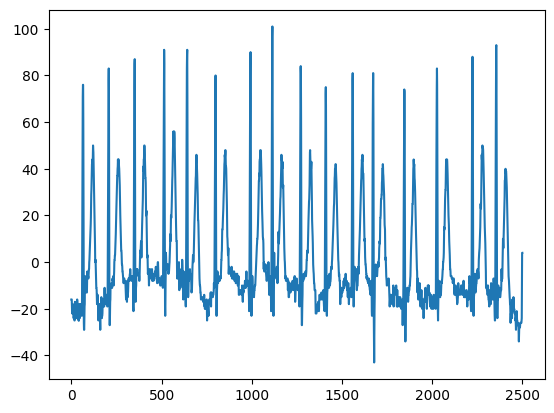

In [22]:
plt.plot(np.swapaxes(np.squeeze(np.load(data_val['npy_path'][0])), -1, 0)[0])

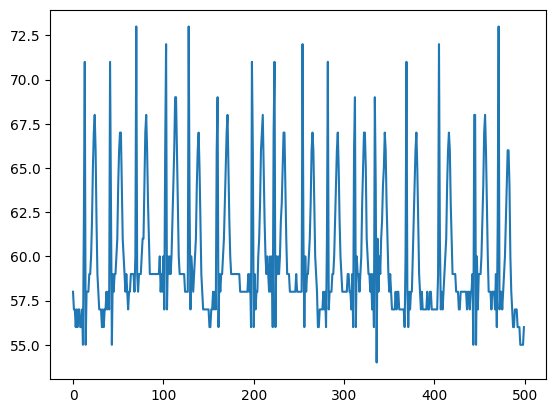

In [6]:
df_ = np.array(list_arrays_).astype(int)
import matplotlib.pyplot as plt
plt.plot(df_[0,0])

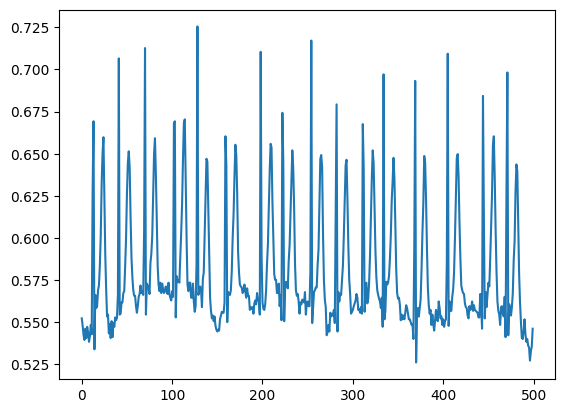

In [25]:
df_ = np.array(list_arrays_)
import matplotlib.pyplot as plt
plt.plot(df_[0,0])

In [4]:
filtered = data_test[~data_test.index.isin(list_to_remove)]
np.save('/media/data1/anolin/test_X_llm.npy',np.array(list_arrays_))
np.save('/media/data1/anolin/test_Y_llm.npy',np.array(filtered[['diagnosis_eng']]))